# **🗂️ Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# 📂 **Dataset Description and Loading**

## 📌 **Overview**  
Dataset ini berisi **10.000 catatan siswa** dengan berbagai faktor yang dapat mempengaruhi **kinerja akademik**. Dataset ini dapat digunakan untuk mengeksplorasi hubungan antara **jam belajar, nilai sebelumnya, kegiatan ekstrakurikuler, pola tidur, serta jumlah latihan soal** terhadap **Performance Index** siswa.  

## 🎯 **Tujuan utama dari dataset ini:**  
✔ Menganalisis faktor-faktor yang berkontribusi terhadap prestasi akademik siswa  
✔ Membangun model prediktif untuk memperkirakan **Performance Index**  
✔ Mengidentifikasi pola belajar yang efektif berdasarkan data  

---

## 🏷 **Dataset Features**
Dataset ini terdiri dari beberapa variabel sebagai berikut:

| 🏷 Feature                     | 📖 Description |
|--------------------------------|---------------|
| **📚 Hours Studied**            | Total jam belajar siswa dalam sehari |
| **🏆 Previous Scores**         | Nilai ujian sebelumnya dari siswa |
| **🎭 Extracurricular Activities** | Partisipasi dalam kegiatan ekstrakurikuler (`Yes`/`No`) |
| **😴 Sleep Hours**             | Rata-rata jumlah jam tidur per hari |
| **📝 Sample Question Papers Practiced** | Jumlah latihan soal yang dikerjakan siswa |
| **🎯 Performance Index** (Target) | Indeks kinerja akademik siswa (bernilai antara **10-100**) |

📌 **Catatan:**  
- Dataset ini **bersifat sintetis** dan dibuat hanya untuk keperluan ilustratif.  
- Hubungan antara variabel dalam dataset ini mungkin tidak mencerminkan kondisi dunia nyata.

---

## ❓ **Masalah atau Kasus yang Ingin Diselesaikan**  
Dataset ini dapat digunakan untuk menjawab berbagai pertanyaan terkait dengan **faktor-faktor yang mempengaruhi prestasi akademik siswa**, seperti:  
1. ### **📊 Prediksi Kinerja Akademik**  
   Menggunakan variabel seperti **jam belajar, nilai sebelumnya, partisipasi ekstrakurikuler, jam tidur, dan jumlah latihan soal** untuk membangun model regresi yang **memprediksi Performance Index** siswa. Model ini dapat membantu mengantisipasi potensi kinerja siswa berdasarkan input yang diberikan.  

2. ### **⚖ Analisis Pengaruh Masing-Masing Variabel**  
   Menilai **seberapa besar pengaruh** tiap variabel terhadap kinerja akademik. Misalnya, apakah **jam belajar atau nilai sebelumnya** memiliki dampak yang lebih signifikan? Bagaimana partisipasi dalam **ekstrakurikuler** mempengaruhi Performance Index?  

3. ### **🏷 Segmentasi Siswa Berdasarkan Kinerja**  
   Mengelompokkan siswa ke dalam kategori **(misalnya, Meningkat, Tetap, dan Menurun)** untuk mengetahui karakteristik masing-masing kelompok. Hal ini dapat membantu dalam **merancang intervensi** yang lebih terfokus.   


In [ ]:
try:
    df = pd.read_csv('student.csv')
except FileNotFoundError:
    print("File not found")
    exit(1)

# 📊 **Understanding The Data**  

Mari kita lihat dataset ini lebih dalam agar lebih paham bagaimana struktur dan isi konten dataset ini.

In [ ]:
df.shape

(10000, 6)

Dapat dilihat bahwa dataset memiliki **10000 baris** dan **6 kolom**.

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


**Performance Index** merupakan dependent/target variabel, sisanya adalah variabel indpendent.


Maka **Dependent Variabel** ini lah yang akan jadi fokus pada fase prediksi, setelah analisis deskriptif dan analisis data eksploratori (EDA) untuk mengungkap pola yang mendasarinya.

In [ ]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Dapat dilihat bahwa semuanya **aman**, maksudnya adalah semua fitur memiliki tipe data yang sesuai dengan seharusnya.

Selanjutnya dilihat **distribusi** data numerik pada dataset ini.

In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Dapat dilihat diatas Dataset terlihat **seimbang** dengan nilai yang wajar. Rata-rata `Hours Studied` adalah **5 jam**, `Sleep Hours` sekitar **6,5 jam**, dan `Performance Index` berkisar di **55**. `Previous Scores` menunjukkan variasi yang cukup besar **(std = 17.34)**, sedangkan `Sample Question Papers` memiliki distribusi yang cukup merata dari **0 hingga 9**. Nilai minimum dan maksimum setiap fitur juga berada dalam rentang yang masuk akal.

# **⚒️ Data Wrangling**

Pada proses ini dilakukan cleaning, transforming, dan mengorganisisr data mentah untuk memastikan data konsisten, bebas dari error, dan siap untuk dilakukan analisa

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.duplicated().sum()

127

Pertama, lihat apakah data memiliki missing values atau tidak.

In [ ]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Dapat dilihat di hasil diatas, data tidak memiliki missing value.

Selanjutnya lihat apakah dataset memiliki noise atau tidak, noise adalah nilai abnormal yang dapat mengganggu kualitas data.

In [ ]:
for i in df.columns:
    print(i, df[i].value_counts())

Hours Studied Hours Studied
1    1152
6    1133
7    1129
3    1119
9    1115
5    1094
8    1088
4    1085
2    1085
Name: count, dtype: int64
Previous Scores Previous Scores
54    216
87    208
56    192
62    184
89    182
60    181
53    181
77    181
52    176
58    176
57    176
49    175
66    175
65    175
84    175
91    175
97    174
79    174
40    173
83    173
75    172
70    172
93    172
47    172
92    172
90    172
42    171
44    170
48    170
95    169
41    169
67    168
43    167
73    166
61    165
78    165
88    164
59    163
63    163
46    163
86    162
81    161
71    159
99    159
85    159
96    159
98    158
45    154
69    153
80    153
68    153
82    148
94    148
72    148
64    147
55    144
74    143
76    142
51    140
50    123
Name: count, dtype: int64
Extracurricular Activities Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64
Sleep Hours Sleep Hours
8    1804
7    1676
6    1673
9    1622
4    1619
5    1606
Name: coun

Dapat dilihat di atas, bahwa tidak ada nilai aneh seperti (?) pada data. Jadi aman.


Sekarang cek outlier

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Mendeteksi outlier untuk setiap kolom numerik
numeric_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours',
                   'Sample Question Papers Practiced', 'Performance Index']

for column in numeric_columns:
    outliers = detect_outliers(df, column)
    print(f"Jumlah outlier di kolom {column}: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Range nilai normal untuk {column}: "
              f"{df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)):.2f} - "
              f"{df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)):.2f}")

Jumlah outlier di kolom Hours Studied: 0
Jumlah outlier di kolom Previous Scores: 0
Jumlah outlier di kolom Sleep Hours: 0
Jumlah outlier di kolom Sample Question Papers Practiced: 0
Jumlah outlier di kolom Performance Index: 0


Dari informasi diatas, dapat di tarik kesimpulan bahwa dataset ini tergolong **sangat bersih**

# 📊 **Analisis Deskriptif**  

> Pada bagian ini, dilakukan pemahaman yang lebih mendalam fitur utama dalam dataset. 🔍  

## 🔹 **Tujuan Analisis**  
📌 Menjelaskan distribusi data pada setiap fitur utama.  
📌 Mengidentifikasi pola dan hubungan antar variabel.  
📌 Menentukan faktor dominan yang mempengaruhi **Performance Index** siswa.  

Selanjutnya, ksetiap fitur dianalisis dengan visualisasi yang mendukung pemahaman lebih mendalam. 🚀📈  


In [ ]:
plt.style.use('ggplot')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

## 📈 **Distribusi Fitur Numerik**  

Sebagai langkah awal, dilakukan eksplorasi **distribusi** dari setiap fitur numerik untuk memahami pola data secara lebih mendalam. 🔍  

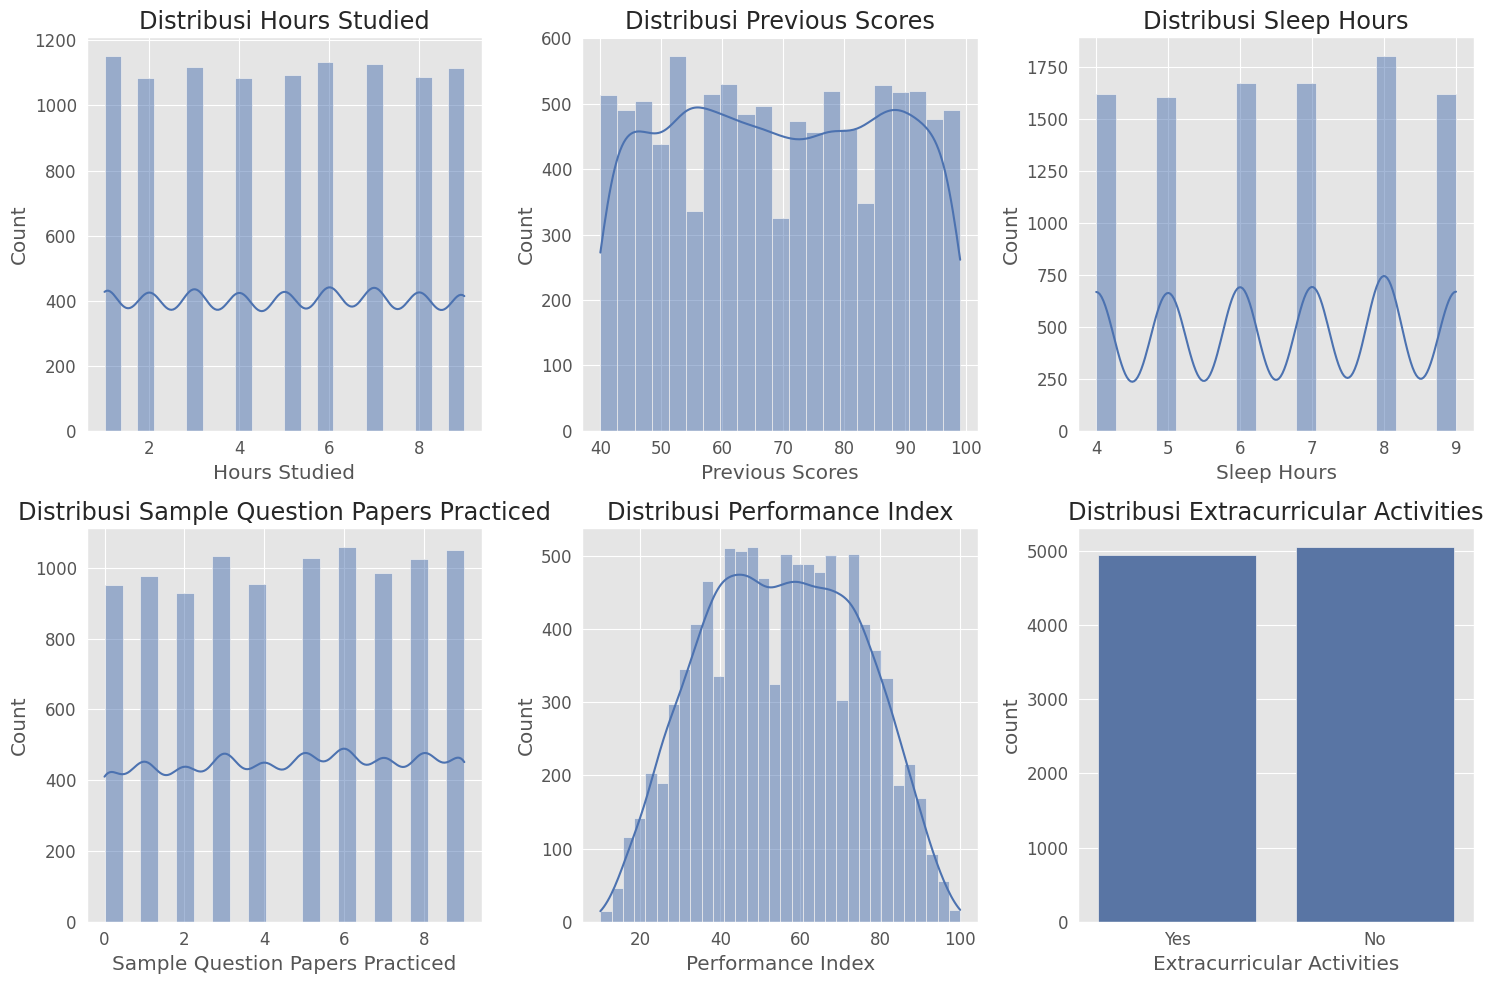

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['Hours Studied'], kde=True)
plt.title('Distribusi Hours Studied')

plt.subplot(2, 3, 2)
sns.histplot(df['Previous Scores'], kde=True)
plt.title('Distribusi Previous Scores')

plt.subplot(2, 3, 3)
sns.histplot(df['Sleep Hours'], kde=True)
plt.title('Distribusi Sleep Hours')

plt.subplot(2, 3, 4)
sns.histplot(df['Sample Question Papers Practiced'], kde=True)
plt.title('Distribusi Sample Question Papers Practiced')

plt.subplot(2, 3, 5)
sns.histplot(df['Performance Index'], kde=True)
plt.title('Distribusi Performance Index')

plt.subplot(2, 3, 6)
sns.countplot(x='Extracurricular Activities', data=df)
plt.title('Distribusi Extracurricular Activities')

plt.tight_layout()
plt.show()
plt.close()

🔎  Dapat dilihat bahwa sebagian besar data terdistribusi normal atau seragam, dengan sedikit kecenderungan ke kanan pada **Previous Scores**. Tidak ada outlier yang signifikan dalam grafik ini, menunjukkan data relatif bersih.  

## **💥 Performance Index VS Previous Score**

Karena variabel **target** kita adalah `Performance Index`, saya akan melihat perbandingan total dari `Previous Score` dengan total dari `Performance Index`, yang mana ini akan dapat memperlihatkan **tren** dari peforma murid seiring waktu.📊📈    

In [ ]:
# Menghitung total Previous Scores dan Performance Index
total_scores = df[["Previous Scores", "Performance Index"]].sum().to_frame().T

# Menampilkan hasil
total_scores

,Previous Scores,Performance Index
0,694457.0,552248.0


Dapat dilihat bahwa total nilai **menurun**, dimana total nilai ujian sebelumnya lebih tinggi daripada total nilai ujian saat ini. Ini menandakan bahwa **mayoritas murid mengalami penurunan**.

> Sekarang saya akan mencari tahu faktor apa yang menyebabkan penurunan tersebut🕵️‍♀️.

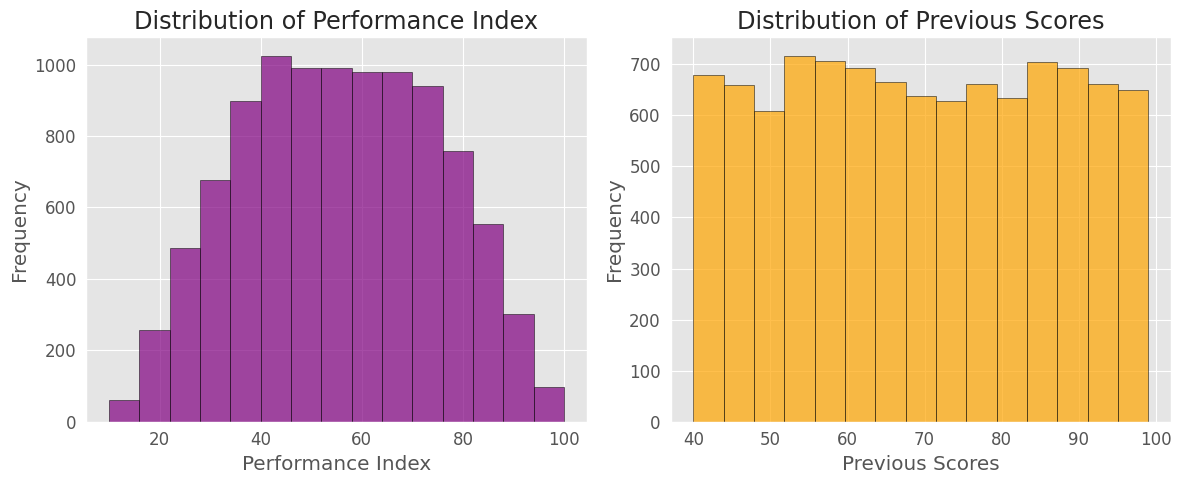

In [ ]:
# Membuat subplot untuk dua histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram untuk Performance Index
axes[0].hist(df["Performance Index"], bins=15, color="purple", alpha=0.7, edgecolor="black")
axes[0].set_title("Distribution of Performance Index")
axes[0].set_xlabel("Performance Index")
axes[0].set_ylabel("Frequency")

# Histogram untuk Previous Scores
axes[1].hist(df["Previous Scores"], bins=15, color="orange", alpha=0.7, edgecolor="black")
axes[1].set_title("Distribution of Previous Scores")
axes[1].set_xlabel("Previous Scores")
axes[1].set_ylabel("Frequency")

# Mengatur tata letak agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()


Dari histogram, kita bisa lihat bahwa:  

- 📉 **Skor terendah di ujian sebelumnya** adalah **40**, sedangkan **skor tertinggi** mencapai **99**.  
- 🔻 Di ujian saat ini, terjadi **penurunan drastis**, dengan **skor terendah** turun hingga **10**.  
- 🎯 Namun, berbeda dari ujian sebelumnya, kini ada yang **mencapai skor sempurna (100)**.  
- 📈 **Distribusi nilai di ujian sebelumnya** cukup **merata** di semua kategori.  
- 🔍 Sementara itu, di ujian sekarang, **skor paling banyak** berada di rentang **37-73**, dan jumlahnya berkurang di bawah **37** maupun di atas **73**.  

💡 **Kesimpulan:** Ada perubahan signifikan dalam distribusi nilai, dengan lebih banyak siswa mendapatkan skor menengah, sementara skor ekstrem (baik rendah maupun tinggi) lebih sedikit dibandingkan sebelumnya.


## **🎓 Pengelompokan Murid**

Sekarang kita dapat menentukan berapa jumlah murid yang memiliki peningkatan nilai, nilai tetap, dan penurunan nilai.

Cara cukup simpel, kita hanya perlu membandingkan nilai `Previous Scores` dan `Performance Index`.

In [ ]:
student_increased = df[(df['Performance Index'] > df['Previous Scores'])]
student_decreased = df[(df['Performance Index'] < df['Previous Scores'])]
student_still = df[(df['Performance Index'] == df['Previous Scores'])]

Setelah kita mengkelompokkan semua murid, kita dapat melihat jenis kategori murid apa yang mendominasi di datasaet ini.

In [ ]:
total_students = len(df)
increased_percent = (len(student_increased) / total_students) * 100
decreased_percent = (len(student_decreased) / total_students) * 100
still_percent = (len(student_still) / total_students) * 100

print("============Jumlah Siswa================")
print(f"Jumlah Siswa yang Nilainya Meningkat: {len(student_increased)}")
print(f"Jumlah Siswa yang Nilainya Menurun: {len(student_decreased)}")
print(f"Jumlah Siswa yang Nilainya Tetap: {len(student_still)}")
print("\n============Persentase================")
print(f"Peningkatan Nilai: {increased_percent:.2f}%")
print(f"Penurunan Nilai: {decreased_percent:.2f}%")
print(f"Nilai Tetap: {still_percent:.2f}%")

============Jumlah Siswa================
Jumlah Siswa yang Nilainya Meningkat: 101
Jumlah Siswa yang Nilainya Menurun: 9800
Jumlah Siswa yang Nilainya Tetap: 99

============Persentase================
Peningkatan Nilai: 1.01%
Penurunan Nilai: 98.00%
Nilai Tetap: 0.99%


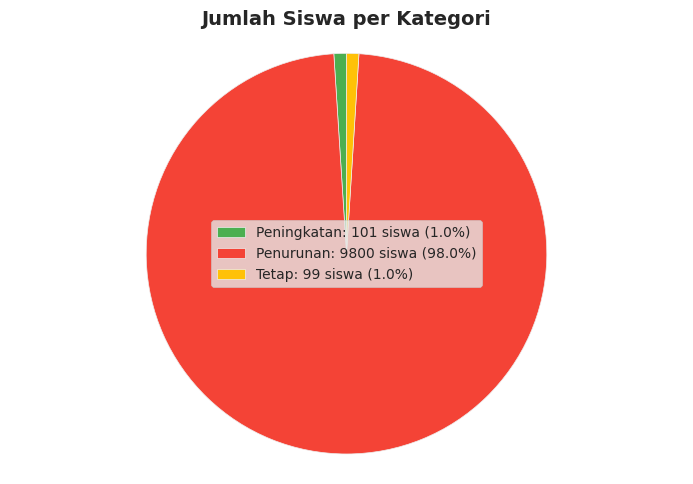

In [ ]:
student_increased_count = len(student_increased)
student_decreased_count = len(student_decreased)
student_still_count = len(student_still)

labels = ['Peningkatan', 'Penurunan', 'Tetap']
sizes = [increased_percent, decreased_percent, still_percent]
counts = [student_increased_count, student_decreased_count, student_still_count]
colors = ['#4CAF50', '#F44336', '#FFC107']

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.pie(counts, labels=None, colors=colors, autopct=None, startangle=90)
plt.axis('equal')

legend_labels = [f'{l}: {c} siswa ({p:.1f}%)' for l, c, p in zip(labels, counts, sizes)]
plt.legend(legend_labels, loc='center', fontsize=10)
plt.title("Jumlah Siswa per Kategori", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


📊 Setelah menampilkan hasil dan memvisualisasikannya dengan **diagram lingkaran**, terlihat jelas bahwa **📈 101 siswa mengalami peningkatan nilai**, yang setara dengan **sekitar 1% dari total siswa**.  

📉 **Sebaliknya, 9.800 siswa mengalami penurunan nilai**, angka yang sangat besar, mencapai **98% dari keseluruhan data**.  

➖ **Terakhir, 99 siswa memiliki nilai yang tetap**, yang juga sekitar **1%** dari total populasi.  

## **🧮 Analisis Kategori Murid**

Selanjutnya adalah kita akan eksplor ketiga kategori untuk mengetahui karakterisitik setiap kategori.

Karena dataset ini termasuk dataset yang bersih, kemudian juga tiap fitur dapat dikatakan terdistribusi normal, maka pendekatan analisis dengan menggunakan **mean** dapat di gunakan.

**Pertama kita akan melakukan analisa pada jumlah jam tidur dari ketiga kelompok.**

========== Rata-rata Jam Tidur ==========
Siswa dengan Nilai Meningkat: 7.68 jam
Siswa dengan Nilai Menurun: 6.51 jam
Siswa dengan Nilai Tetap: 7.52 jam


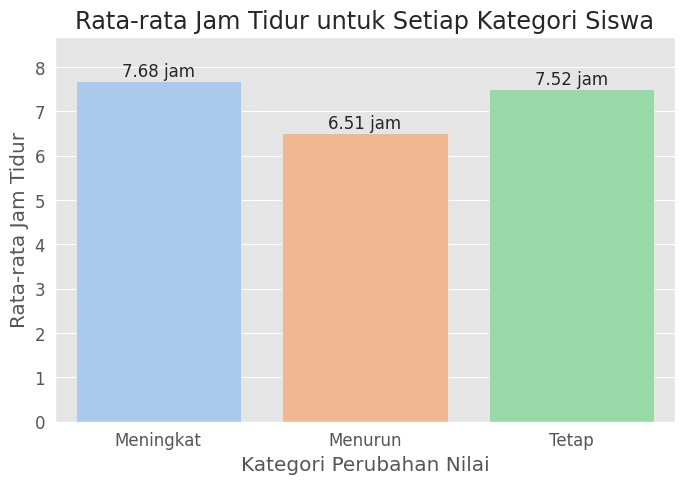

In [ ]:
# Hitung rata-rata jam tidur untuk setiap kategori
mean_sleep_increased = student_increased['Sleep Hours'].mean()
mean_sleep_decreased = student_decreased['Sleep Hours'].mean()
mean_sleep_still = student_still['Sleep Hours'].mean()

# Tampilkan hasil
print("========== Rata-rata Jam Tidur ==========")
print(f"Siswa dengan Nilai Meningkat: {mean_sleep_increased:.2f} jam")
print(f"Siswa dengan Nilai Menurun: {mean_sleep_decreased:.2f} jam")
print(f"Siswa dengan Nilai Tetap: {mean_sleep_still:.2f} jam")

categories = ['Meningkat', 'Menurun', 'Tetap']
mean_sleep_hours = [mean_sleep_increased, mean_sleep_decreased, mean_sleep_still]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=mean_sleep_hours, palette="pastel", hue=categories)

# Tambahkan label
plt.xlabel("Kategori Perubahan Nilai")
plt.ylabel("Rata-rata Jam Tidur")
plt.title("Rata-rata Jam Tidur untuk Setiap Kategori Siswa")
plt.ylim(0, max(mean_sleep_hours) + 1)

# Tampilkan nilai di atas batang
for i, v in enumerate(mean_sleep_hours):
    plt.text(i, v + 0.1, f"{v:.2f} jam", ha='center', fontsize=12)

plt.show()

Dari grafik di atas, kita dapat melihat pola tidur siswa berdasarkan perubahan nilai mereka:  

- 🟦 **Siswa dengan nilai meningkat** memiliki **rata-rata jam tidur sekitar 7,68 jam**.  
- 🟧 **Siswa dengan nilai menurun** memiliki **rata-rata jam tidur lebih rendah, sekitar 6,51 jam**.  
- 🟩 **Siswa dengan nilai tetap** memiliki **rata-rata jam tidur sekitar 7,52 jam**, hampir sama dengan yang meningkat.  

💡 **Kesimpulan:**  
Siswa yang memiliki nilai meningkat atau tetap cenderung memiliki pola tidur yang lebih stabil, dengan rata-rata sekitar **7 jam per malam**. Sementara itu, siswa yang nilainya menurun memiliki rata-rata jam tidur lebih rendah **(sekitar 6,5 jam)**, yang mungkin berdampak pada performa akademik mereka. 🚀

**Selanjutnya kita akan melakukan analisa pada rata-rata waktu belajar tiap kategori**

========== Rata-rata Jam Belajar ==========
Siswa dengan Nilai Meningkat: 8.96 jam
Siswa dengan Nilai Menurun: 4.91 jam
Siswa dengan Nilai Tetap: 8.93 jam


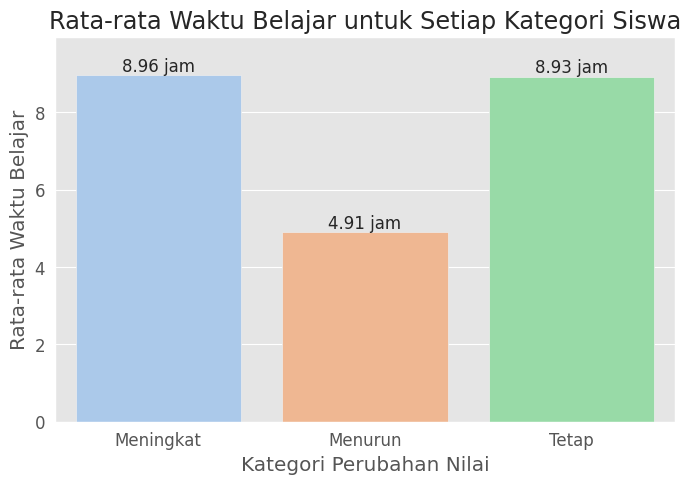

In [ ]:
mean_hours_increased = student_increased['Hours Studied'].mean()
mean_hours_decreased = student_decreased['Hours Studied'].mean()
mean_hours_still = student_still['Hours Studied'].mean()
mean_studied_hours = [mean_hours_increased, mean_hours_decreased, mean_hours_still]

print("========== Rata-rata Jam Belajar ==========")
print(f"Siswa dengan Nilai Meningkat: {mean_hours_increased:.2f} jam")
print(f"Siswa dengan Nilai Menurun: {mean_hours_decreased:.2f} jam")
print(f"Siswa dengan Nilai Tetap: {mean_hours_still:.2f} jam")

plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=mean_studied_hours, palette="pastel", hue=categories)

plt.xlabel("Kategori Perubahan Nilai")
plt.ylabel("Rata-rata Waktu Belajar")
plt.title("Rata-rata Waktu Belajar untuk Setiap Kategori Siswa")
plt.ylim(0, max(mean_studied_hours) + 1)

for i, v in enumerate(mean_studied_hours):
    plt.text(i, v + 0.1, f"{v:.2f} jam", ha='center', fontsize=12)

plt.show()

Dari grafik di atas, terlihat bahwa rata-rata waktu belajar siswa berbeda berdasarkan perubahan nilai mereka:  

- 🟦 **Siswa dengan nilai meningkat** memiliki **rata-rata waktu belajar sekitar 8,96 jam**.  
- 🟧 **Siswa dengan nilai menurun** memiliki **rata-rata waktu belajar paling rendah, hanya sekitar 4,91 jam**.  
- 🟩 **Siswa dengan nilai tetap** memiliki **rata-rata waktu belajar hampir sama dengan yang meningkat, sekitar 8,93 jam**.  

💡 **Kesimpulan:**  
Siswa yang mempertahankan atau meningkatkan nilai mereka cenderung memiliki waktu belajar yang lebih panjang, sekitar **8-9 jam per hari**. Sementara itu, siswa yang mengalami penurunan nilai memiliki waktu belajar jauh lebih sedikit, **kurang dari 5 jam per hari**, yang mungkin menjadi faktor dalam penurunan performa akademik mereka 🚀

**Selanjutnya kita akan melakukan analisa pada rata-rata nilai sebelumnya tiap kategori**

========== Rata-rata Nilai Sebelumnya ==========
Siswa dengan Nilai Meningkat: 72.30
Siswa dengan Nilai Menurun: 69.40
Siswa dengan Nilai Tetap: 71.42


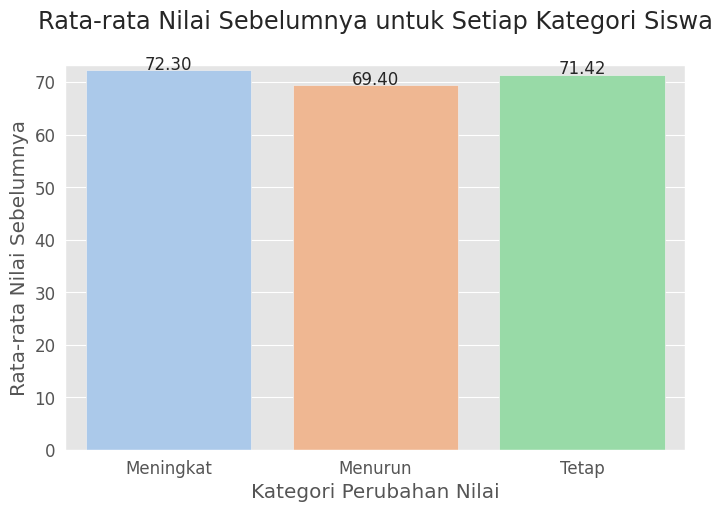

In [ ]:
mean_prev_increased = student_increased['Previous Scores'].mean()
mean_prev_decreased = student_decreased['Previous Scores'].mean()
mean_prev_still = student_still['Previous Scores'].mean()
mean_scores_prev = [mean_prev_increased, mean_prev_decreased, mean_prev_still]

print("========== Rata-rata Nilai Sebelumnya ==========")
print(f"Siswa dengan Nilai Meningkat: {mean_prev_increased:.2f}")
print(f"Siswa dengan Nilai Menurun: {mean_prev_decreased:.2f}")
print(f"Siswa dengan Nilai Tetap: {mean_prev_still:.2f}")

plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=mean_scores_prev, palette="pastel", hue=categories)

plt.xlabel("Kategori Perubahan Nilai")
plt.ylabel("Rata-rata Nilai Sebelumnya")
plt.title("Rata-rata Nilai Sebelumnya untuk Setiap Kategori Siswa\n")
plt.ylim(0, max(mean_scores_prev) + 1)

for i, v in enumerate(mean_scores_prev):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=12)

plt.show()

Dapat dilihat dari grafik di atas menunjukkan rata-rata nilai sebelumnya dari siswa berdasarkan perubahan nilai mereka:  

- 🟦 **Siswa dengan nilai meningkat** memiliki rata-rata nilai sebelumnya **72.30**.  
- 🟧 **Siswa dengan nilai menurun** memiliki rata-rata nilai sebelumnya **69.40**, yang paling rendah di antara kategori lainnya.  
- 🟩 **Siswa dengan nilai tetap** memiliki rata-rata nilai sebelumnya **71.42**, sedikit lebih rendah dari siswa yang nilainya meningkat.  

💡 **Kesimpulan:**  
Siswa yang mengalami **penurunan nilai** awalnya sudah memiliki nilai lebih rendah dibandingkan kelompok lainnya. Ini menunjukkan bahwa mereka mungkin sudah menghadapi kesulitan akademik sejak awal. Perbedaan kecil antara kategori tetap dan meningkat juga bisa menunjukkan bahwa faktor lain, seperti strategi belajar, dapat memengaruhi perubahan nilai.  

**Selanjutnya kita akan melakukan analisa pada rata-rata jumlah kertas pertanyaan yang dilatih tiap kategori**

========== Rata-rata Jumlah Kertas Pertanyaan yang Dikerjakan ==========
Siswa dengan Nilai Meningkat: 6.03
Siswa dengan Nilai Menurun: 4.56
Siswa dengan Nilai Tetap: 5.44


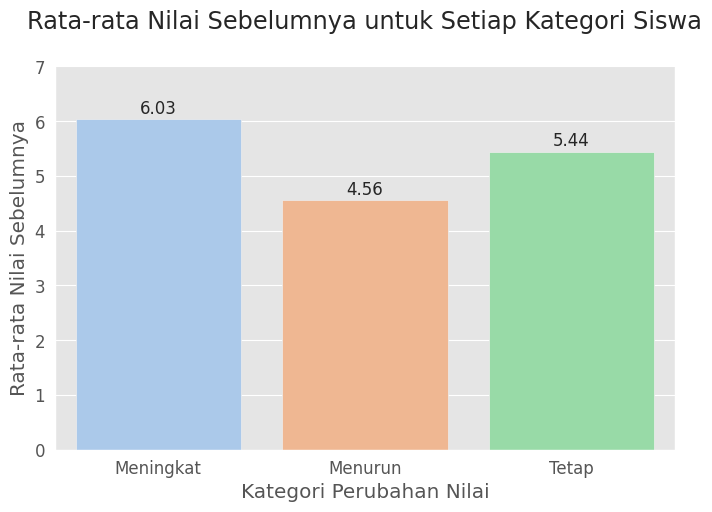

In [ ]:
mean_paper_increased = student_increased['Sample Question Papers Practiced'].mean()
mean_paper_decreased = student_decreased['Sample Question Papers Practiced'].mean()
mean_paper_still = student_still['Sample Question Papers Practiced'].mean()
mean_sample_paper = [mean_paper_increased, mean_paper_decreased, mean_paper_still]

print("========== Rata-rata Jumlah Kertas Pertanyaan yang Dikerjakan ==========")
print(f"Siswa dengan Nilai Meningkat: {mean_paper_increased:.2f}")
print(f"Siswa dengan Nilai Menurun: {mean_paper_decreased:.2f}")
print(f"Siswa dengan Nilai Tetap: {mean_paper_still:.2f}")

plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=mean_sample_paper, palette="pastel", hue=categories)

plt.xlabel("Kategori Perubahan Nilai")
plt.ylabel("Rata-rata Nilai Sebelumnya")
plt.title("Rata-rata Nilai Sebelumnya untuk Setiap Kategori Siswa\n")
plt.ylim(0, max(mean_sample_paper) + 1)

for i, v in enumerate(mean_sample_paper):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=12)

plt.show()

Dapat dilihat bahwa grafik diatas menampilkan jumlah rata-rata kertas pertanyaan yang dikerjakan siswa berdasarkan perubahan nilai mereka:  

- 🟦 **Siswa dengan nilai meningkat** rata-rata mengerjakan **6.03** kertas pertanyaan.  
- 🟧 **Siswa dengan nilai menurun** mengerjakan lebih sedikit, dengan rata-rata **4.56**.  
- 🟩 **Siswa dengan nilai tetap** mengerjakan **5.44** kertas pertanyaan.  

💡 **Kesimpulan:**  
Siswa yang mengerjakan **lebih banyak kertas pertanyaan** cenderung mengalami **peningkatan nilai**, sedangkan mereka yang mengerjakan lebih sedikit cenderung mengalami penurunan. Ini bisa menjadi indikasi bahwa latihan soal yang lebih banyak berkontribusi pada peningkatan performa akademik.  

**Selanjutnya kita akan melakukan analisa pada fitur kategorikal, yaitu ekstrakulikuler**

In [ ]:
df.shape

(10000, 6)

                            Meningkat    Menurun      Tetap
Extracurricular Activities                                 
No                          37.623762  50.836735  32.323232
Yes                         62.376238  49.163265  67.676768


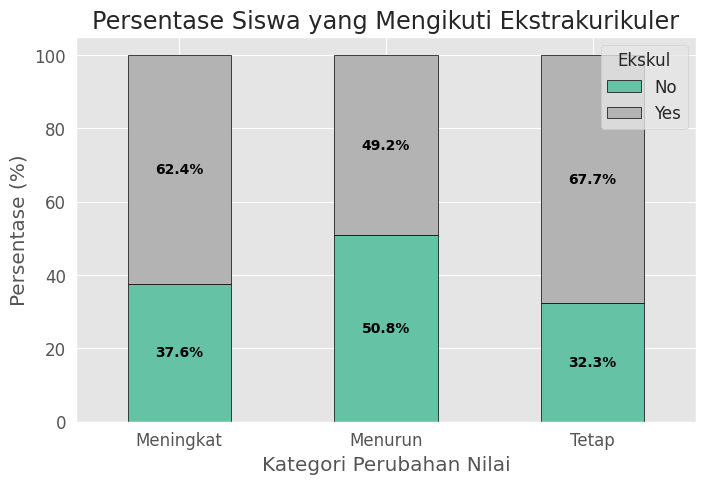

In [ ]:
# Daftar kelompok siswa
groups = {
    "Meningkat": student_increased,
    "Menurun": student_decreased,
    "Tetap": student_still
}

# Menyimpan hasil persentase
result = {}

# Menghitung persentase pada setiap kelompok
for name, sub_df in groups.items():
    counts = sub_df['Extracurricular Activities'].value_counts(normalize=True) * 100
    result[name] = counts

# Konversi ke DataFrame dan atur NaN menjadi 0
result_df = pd.DataFrame(result).fillna(0)

# Menampilkan hasil persentase dalam bentuk tabel
print(result_df)

# Visualisasi dengan diagram batang bertumpuk
ax = result_df.T.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2', edgecolor='black')

# Menambahkan judul dan label
plt.title('Persentase Siswa yang Mengikuti Ekstrakurikuler')
plt.xlabel('Kategori Perubahan Nilai')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.legend(title='Ekskul', loc='upper right')

# Menampilkan angka pada setiap batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='black', weight='bold')

# Tampilkan plot
plt.show()

Dapat dilihat dari grafik di atas menunjukkan persentase siswa yang mengikuti ekstrakurikuler berdasarkan perubahan nilai mereka:  

- **Siswa dengan nilai meningkat** memiliki **62.4%** yang mengikuti ekstrakurikuler, lebih banyak dibandingkan yang tidak (**37.6%**).  
- **Siswa dengan nilai menurun** memiliki **49.2%** yang mengikuti ekstrakurikuler, hampir seimbang dengan yang tidak (**50.8%**).  
- **Siswa dengan nilai tetap** memiliki **67.7%** yang mengikuti ekstrakurikuler, proporsi tertinggi dibandingkan kelompok lainnya.  

💡 **Kesimpulan:**  
Siswa yang **nilai meningkat atau tetap** cenderung lebih banyak mengikuti ekstrakurikuler dibandingkan siswa dengan **nilai menurun**. Hal ini bisa mengindikasikan bahwa ekstrakurikuler memiliki dampak positif terhadap stabilitas atau peningkatan nilai akademik. Namun, siswa dengan nilai menurun memiliki distribusi yang lebih seimbang, sehingga kemungkinan ada faktor lain yang memengaruhi penurunan nilai mereka. 🚀

## 📝 **Kesimpulan Awal dari Analisis Deskriptif**  

Eksplorasi awal menunjukkan bahwa mayoritas siswa mengalami **penurunan nilai** (98%), sementara hanya 1% yang meningkat atau tetap. Pola belajar berperan penting, di mana siswa dengan nilai meningkat atau stabil belajar lebih lama (**8-9 jam/hari**) dibandingkan mereka yang mengalami penurunan (**4-5 jam/hari**). Pola tidur juga mempengaruhi, dengan siswa yang tidur **7-7.5 jam** cenderung memiliki nilai lebih baik dibandingkan yang tidur kurang dari **6.5 jam**. Selain itu, latihan soal berkontribusi terhadap performa akademik—siswa dengan nilai meningkat rata-rata mengerjakan **6 lembar**, sedangkan yang menurun hanya **4.5 lembar**. Ekstrakurikuler juga tampak berdampak, dengan **62-67%** siswa yang nilai meningkat atau stabil aktif dalam kegiatan ini.

**Kesimpulan sementara**, faktor-faktor seperti jam belajar, pola tidur, latihan soal, dan ekstrakurikuler berperan dalam kinerja akademik, namun diperlukan analisis lebih lanjut untuk memahami pengaruhnya secara kuantitatif. 🚀

# **👨🏾‍💻 Exploratory Data Analyst**

Pada tahap ini kita akan mengeksplor apakah ada sebuah hubungan linearitas antara setiap fitur dengan target.

Kita juga akan melihat korelasi antara fitur dengan target variabel

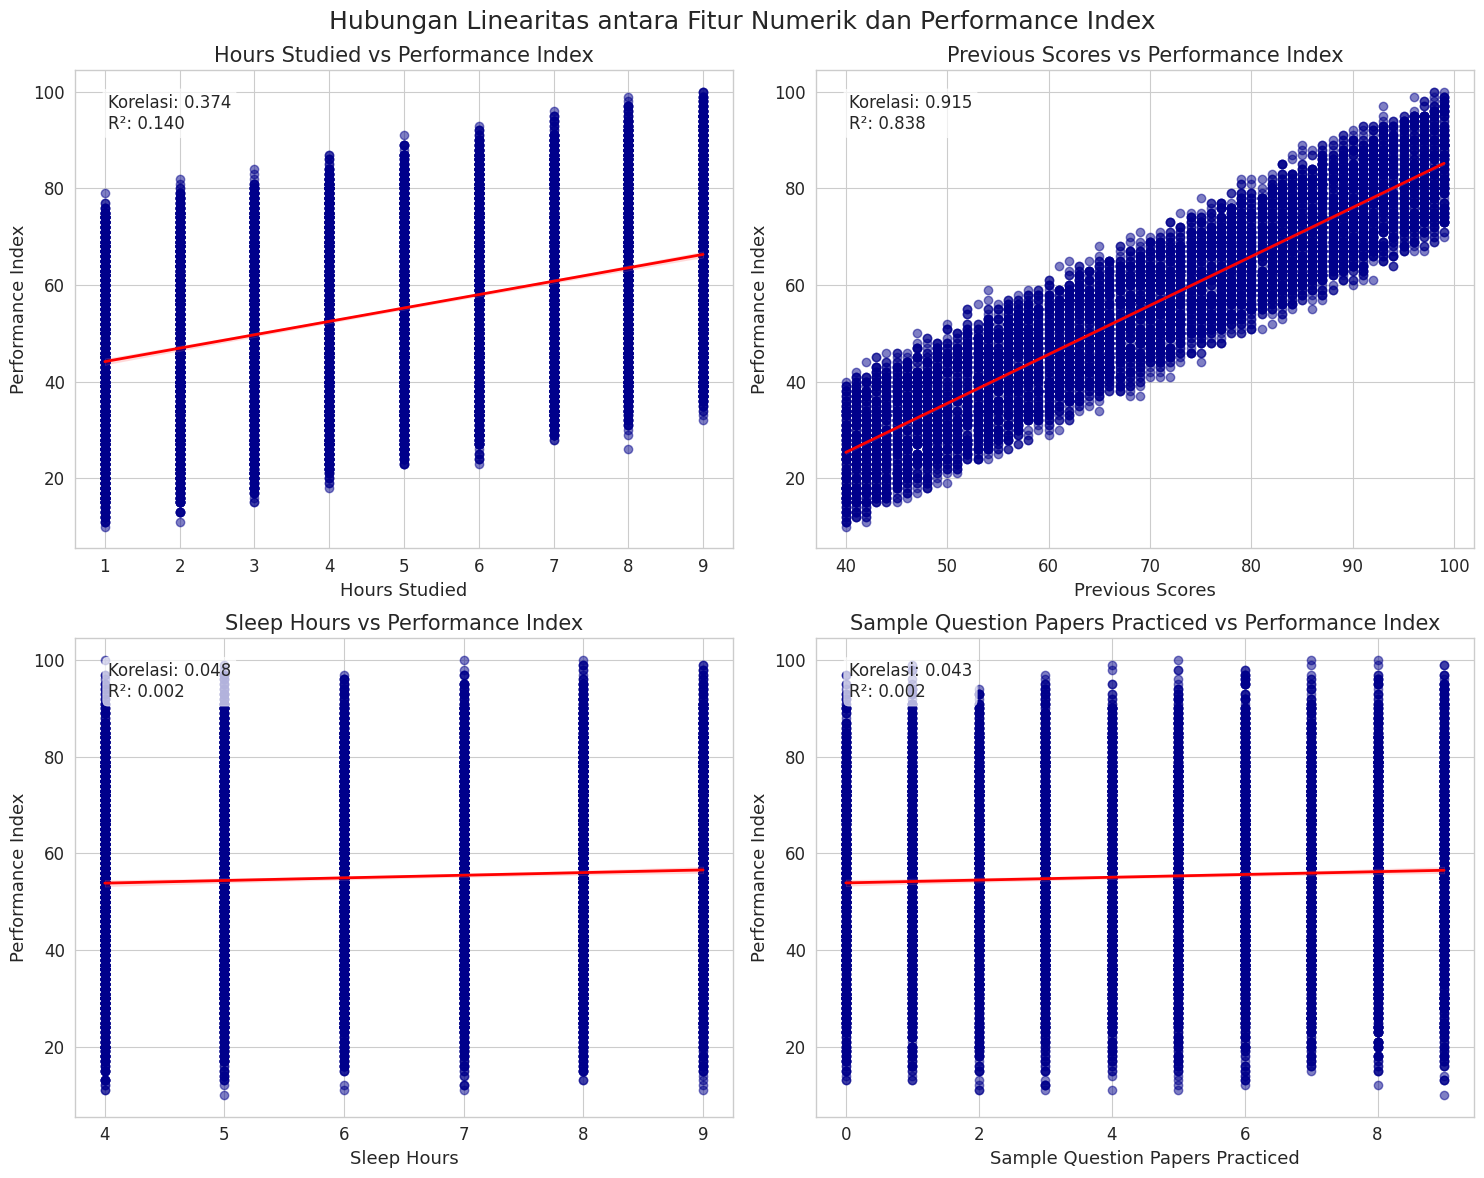

In [ ]:
numeric_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours',
                    'Sample Question Papers Practiced']
target = 'Performance Index'

# Set style untuk visualisasi yang lebih jelas
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# Buat subplot grid untuk scatter plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Plot scatter untuk setiap fitur numerik dengan garis regresi
for i, feature in enumerate(numeric_features):
    ax = axes[i]

    # Scatter plot dengan warna yang konsisten
    sns.regplot(x=feature, y=target, data=df, ax=ax,
                scatter_kws={'alpha': 0.5, 'color': 'darkblue'},
                line_kws={'color': 'red', 'linewidth': 2})

    # Hitung dan tampilkan korelasi Pearson dan R²
    corr, _ = stats.pearsonr(df[feature], df[target])
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[feature], df[target])
    r_squared = r_value**2

    ax.text(0.05, 0.95, f'Korelasi: {corr:.3f}\nR²: {r_squared:.3f}',
            transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    ax.set_xlabel(feature, fontsize=13)
    ax.set_ylabel(target, fontsize=13)
    ax.set_title(f'{feature} vs {target}', fontsize=15)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.suptitle('Hubungan Linearitas antara Fitur Numerik dan Performance Index', fontsize=18)
plt.show()

Dari visualisasi yang disajikan, terdapat beberapa pola menarik yang bisa kita amati:

### 🔍 **Previous Scores vs Performance Index**
Linearitas sangat **menonjol** pada grafik ini! Dengan **korelasi 0.915** dan **R² mencapai 0.838**, nilai ujian sebelumnya menjadi **prediktor terkuat** untuk performance index. Garis merah yang naik secara konsisten menunjukkan hubungan **positif yang kuat** - semakin tinggi nilai sebelumnya, semakin tinggi pula performa yang diharapkan.

### 📚 **Hours Studied vs Performance Index**
Grafik ini menunjukkan **korelasi positif moderat (0.374)** dengan **R² sebesar 0.140**. Meski tidak sekuat previous scores, jam belajar tetap memberikan pengaruh **positif** terhadap performa. Setiap jam tambahan belajar cenderung **meningkatkan** performance index, meskipun dengan variasi yang cukup lebar.

### 😴 **Sleep Hours vs Performance Index**
Dengan **korelasi hanya 0.048** dan **R² sebesar 0.002**, **hampir tidak ada hubungan linear** antara jam tidur dengan performa. Garis trendline yang hampir **datar** menunjukkan bahwa menambah jam tidur (dalam rentang 4-9 jam) **tidak signifikan** mempengaruhi performance index.

### 📝 Sample Question Papers vs Performance Index
Serupa dengan jam tidur, latihan soal menunjukkan **korelasi sangat lemah (0.043)** dengan **R² hanya 0.002**. Jumlah latihan soal yang dikerjakan tampaknya **tidak menjadi faktor penentu** dalam meningkatkan performa.

### 💡 Kesimpulan
**Nilai sebelumnya adalah prediktor terbaik untuk performa, menunjukkan bahwa kemampuan dasar/konsistensi siswa sangat berpengaruh. Jam belajar juga berkontribusi positif meski tidak sekuat previous scores. Sementara itu, jam tidur dan jumlah latihan soal tidak menunjukkan dampak signifikan pada performa dalam dataset ini.**

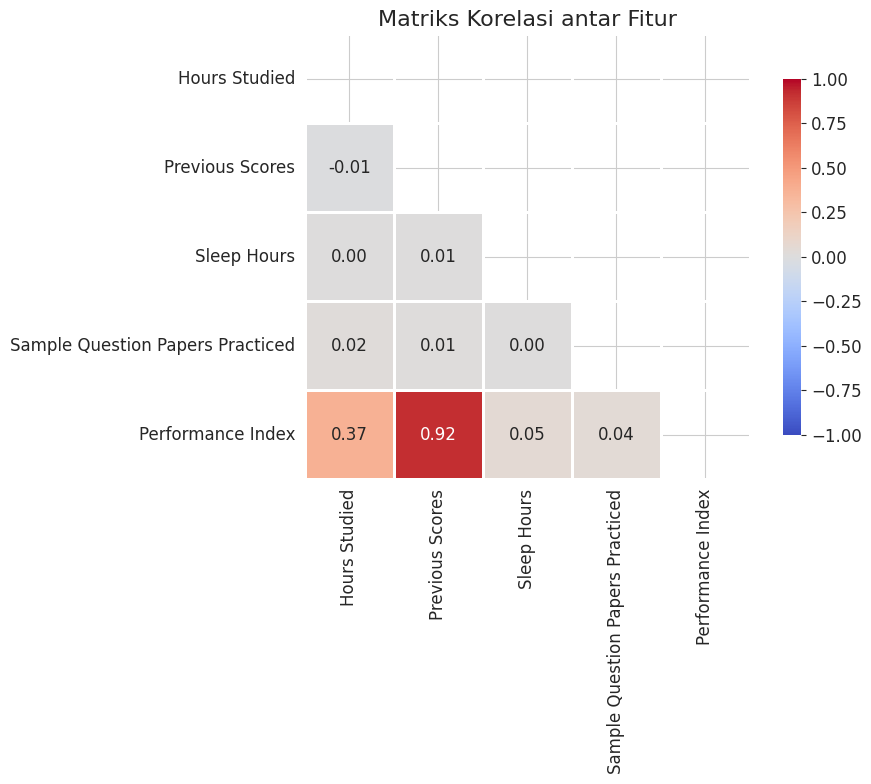

In [ ]:
# Pilih hanya kolom numerik untuk korelasi
# Konversi 'Extracurricular Activities' menjadi numerik (Yes=1, No=0)
df_numeric = df.drop(columns='Extracurricular Activities')

# Hitung korelasi
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(correlation_matrix)  # Untuk menampilkan hanya setengah bawah matrix

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            mask=mask, vmin=-1, vmax=1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .8})

plt.title('Matriks Korelasi antar Fitur', fontsize=16)
plt.tight_layout()
plt.show()

Matriks korelasi menunjukkan pola hubungan yang sangat menarik antara variabel-variabel dalam dataset. **Previous Scores** terlihat memiliki korelasi sangat kuat dengan **Performance Index** (0.92), mengkonfirmasi visualisasi sebelumnya bahwa nilai akademik terdahulu menjadi prediktor terkuat performa siswa. Sementara itu, **Hours Studied** menunjukkan korelasi moderat positif (0.37) dengan Performance Index, menegaskan bahwa durasi belajar tetap memberikan kontribusi terhadap pencapaian akademik.

Yang menarik untuk diperhatikan adalah hampir tidak adanya korelasi antar variabel independen (Hours Studied, Previous Scores, Sleep Hours, dan Sample Question Papers), terlihat dari nilai-nilai yang mendekati nol. Ini mengindikasikan bahwa setiap variabel tersebut mengukur aspek berbeda dari perilaku belajar siswa tanpa tumpang tindih signifikan.

Meskipun korelasi tinggi yang terlihat pada matriks ini memberikan gambaran awal yang berharga, penting untuk diingat bahwa nilai korelasi ini masih perlu diuji signifikansinya menggunakan **p-value**. Pengujian p-value akan menjadi langkah selanjutnya yang saya lakukan untuk memastikan bahwa hubungan yang teramati memang signifikan secara statistik dan bukan hasil dari kebetulan sampling. Analisis p-value akan membantu memvalidasi temuan ini dan memberikan landasan yang lebih kuat untuk rekomendasi praktis dalam meningkatkan performa akademik.

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
def calculate_correlation_significance(df, target='Performance Index'):
    """
    Calculate Pearson correlation and p-value between each feature and the target variable

    Parameters:
    -----------
    df : pandas DataFrame
        The dataset containing the features and target
    target : str
        The name of the target column

    Returns:
    --------
    pandas DataFrame
        A DataFrame containing feature names, correlation coefficients, p-values, and significance
    """
    features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

    results = []

    for feature in features:
        corr, p_value = pearsonr(df[feature], df[target])

        if p_value < 0.001:
            significance = '***'  # Highly significant
        elif p_value < 0.01:
            significance = '**'   # Very significant
        elif p_value < 0.05:
            significance = '*'    # Significant
        else:
            significance = 'ns'   # Not significant

        # Append results
        results.append({
            'Feature': feature,
            'Correlation': corr,
            'P-value': p_value,
            'Significance': significance
        })

    # Convert to DataFrame and sort by absolute correlation
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='Correlation', key=abs, ascending=False)

    return results_df

def plot_correlation_significance(results_df):
    """
    Create a visualization of correlation coefficients with significance indicators

    Parameters:
    -----------
    results_df : pandas DataFrame
        The DataFrame with correlation results from calculate_correlation_significance
    """
    plt.figure(figsize=(10, 6))

    # Create bar plot
    bars = plt.bar(
        results_df['Feature'],
        results_df['Correlation'],
        color=[
            'darkred' if sig == '***' else
            'red' if sig == '**' else
            'lightcoral' if sig == '*' else
            'lightgrey'
            for sig in results_df['Significance']
        ]
    )

    for i, (_, row) in enumerate(results_df.iterrows()):
        plt.text(
            i,
            row['Correlation'] + (0.05 if row['Correlation'] >= 0 else -0.05),
            row['Significance'],
            ha='center'
        )

    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

    plt.title('Correlation with Performance Index and Statistical Significance')
    plt.ylabel('Pearson Correlation Coefficient')
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='darkred', label='p < 0.001 (***)'),
        Patch(facecolor='red', label='p < 0.01 (**)'),
        Patch(facecolor='lightcoral', label='p < 0.05 (*)'),
        Patch(facecolor='lightgrey', label='Not significant')
    ]
    plt.legend(handles=legend_elements, loc='best')

    plt.tight_layout()
    plt.show()

Correlation Analysis with Performance Index:
                            Feature  Correlation   P-value Significance
1                   Previous Scores     0.915189  0.000000          ***
0                     Hours Studied     0.373730  0.000000          ***
2                       Sleep Hours     0.048106  0.000001          ***
3  Sample Question Papers Practiced     0.043268  0.000015          ***


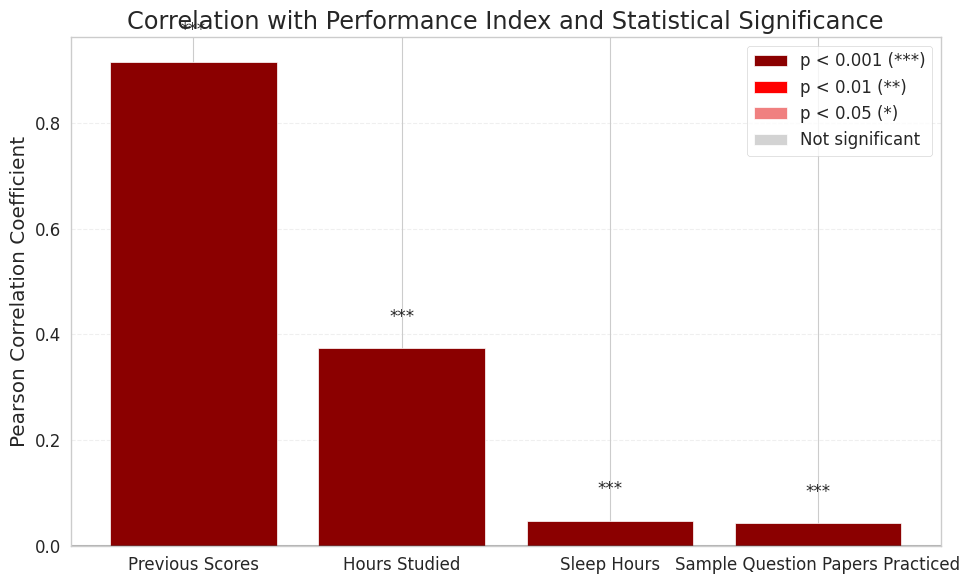

In [ ]:
corr_results = calculate_correlation_significance(df)
print("Correlation Analysis with Performance Index:")
print(corr_results)

plot_correlation_significance(corr_results)

Grafik dan tabel menunjukkan korelasi antara empat variabel dengan Indeks Performa, beserta signifikansi statistiknya. **Semua korelasi terbukti signifikan secara statistik** (p < 0.001), yang ditandai dengan simbol ***. Ini berarti hubungan yang terlihat dalam data dapat dipercaya dan bukan hasil kebetulan.

### 🔍 Detail Temuan

1. **Nilai Sebelumnya** (r = 0.915)
   * Korelasi sangat kuat dengan Indeks Performa
   * Prediktor terkuat untuk keberhasilan akademis siswa
   * Signifikansi sangat tinggi (p < 0.00001)

2. **Jam Belajar** (r = 0.374)
   * Korelasi moderat positif
   * Menunjukkan durasi belajar berkontribusi nyata pada performa
   * Signifikan secara statistik (p < 0.00001)

3. **Jam Tidur** (r = 0.048)
   * Korelasi lemah namun tetap signifikan
   * Meskipun efeknya kecil, peran tidur dalam performa akademis terkonfirmasi

4. **Latihan Soal** (r = 0.043)
   * Korelasi lemah tetapi signifikan
   * Membuktikan bahwa latihan soal memberi dampak nyata

Kesimpulannya adalah, temuan ini menjadi dasar bagi kita bahwa hubungan korelasi yang kuat antara `Previous Scores` dan `Hours Studied` dengan `Performance Index` merupakan bukan suatu kebetulan semata, yang mana berarti **statistically significant**

Sekarang kita akan melihat Apakah Ekstrakurikuler Berpengaruh pada Index Peforma

Untuk menjawab pertanyaan ini, kita akan melihat distribusi nilai **Performance Index** berdasarkan partisipasi dalam **Extracurricular Activities** menggunakan **Violin Plot**.

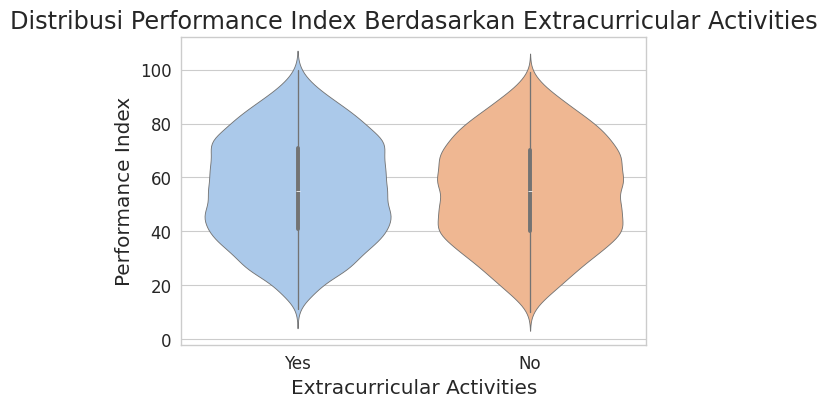

In [ ]:
plt.figure(figsize=(6, 4))
sns.violinplot(x=df["Extracurricular Activities"], y=df["Performance Index"], palette="pastel", hue=df["Extracurricular Activities"])
plt.xlabel("Extracurricular Activities")
plt.ylabel("Performance Index")
plt.title("Distribusi Performance Index Berdasarkan Extracurricular Activities")
plt.show()

Grafik di atas menampilkan distribusi **Performance Index** berdasarkan partisipasi dalam **Extracurricular Activities** menggunakan violin plot. Bentuk distribusi pada kedua kategori, yaitu "Yes" dan "No", terlihat cukup mirip, dengan persebaran nilai yang hampir sama.

Kedua kategori memiliki rentang nilai Performance Index yang luas, mulai dari sekitar 20 hingga 100, dengan median yang juga berada di kisaran tengah. Hal ini menunjukkan bahwa partisipasi dalam kegiatan ekstrakurikuler tidak memberikan perbedaan signifikan terhadap distribusi Performance Index.

Dengan kata lain, baik siswa yang mengikuti ekstrakurikuler maupun yang tidak, memiliki kecenderungan nilai yang serupa. Oleh karena itu, dapat disimpulkan bahwa faktor ekstrakurikuler tidak memiliki dampak yang mencolok terhadap pencapaian akademik berdasarkan Performance Index yang ditampilkan.

# **🌟 Pemilihan Fitur**

## 🔍 Analisis Korelasi dan Pemilihan Fitur  

Setelah melihat hasil korelasi dan p-value, terlihat bahwa **dua fitur yang paling berpengaruh** terhadap **Performance Index** adalah:  
✔️ **Previous Scores**  
✔️ **Hours Studied**  

Kedua fitur ini memiliki hubungan yang cukup kuat dengan target, sehingga lebih **relevan untuk dimasukkan ke dalam model prediksi.**  

### 🎯 Kesimpulan  
📊 **Memilih fitur yang benar-benar relevan** akan membuat model lebih sederhana, lebih efisien, dan tetap akurat.  

# **🤖 Modelling and Evaluation**

Berdasarkan hasil **Exploratory Data Analysis (EDA)** yang telah dilakukan, saya memutuskan untuk menggunakan **Regresi Linear** khususnya **Regresi Multi Linear**.

Keputusan ini diambil karena hubungan linearitas antara variabel independen dengan variabel target terlihat cukup jelas.

Sebelum menerapkan regresi linear, kita perlu melakukan **preprocessing data** agar model dapat bekerja dengan optimal.
##### 🔹 **Langkah-langkah preprocessing:**
1️⃣ **Encoding variabel kategorikal**  
   - Mengubah variabel kategorikal menjadi nilai biner (0 dan 1) agar dapat digunakan dalam model regresi.  

2️⃣ **Standarisasi variabel numerik**  
   - Menstandarisasi nilai-nilai numerik agar memiliki skala yang seragam, sehingga model dapat lebih stabil dan performa lebih optimal.  

Dengan preprocessing ini, kita memastikan bahwa data siap untuk dianalisis dengan regresi linear secara lebih akurat. 🚀  

In [ ]:
X = df.drop(columns=['Performance Index', 'Extracurricular Activities', 'Sleep Hours'])

X

,Hours Studied,Previous Scores,Sample Question Papers Practiced
0,7,99,1
1,4,82,2
2,8,51,2
3,5,52,2
4,7,75,5
...,...,...,...
9995,1,49,2
9996,7,64,5
9997,6,83,5
9998,9,97,0


In [ ]:
y = df['Performance Index']

y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

Disini saya akan melakukan split, dimana 20% test dan sisanya 80% untuk menjadi train

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 🚀 Membangun Pipeline Model  

Agar proses berjalan otomatis dan efisien, kita menggunakan **Pipeline**! 🔄  

🔹 **One-Hot Encoding** 🎭 → Mengubah data kategorikal menjadi format numerik.  
🔹 **Standard Scaler** 📏 → Menstandarisasi data numerik agar model lebih stabil.  
🔹 **Linear Regression** 📊 → Model utama yang akan kita gunakan untuk prediksi.  

Dengan pipeline ini, semua tahap preprocessing & modeling dilakukan dalam satu langkah! 🔥  


In [ ]:
numerical_columns = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), numerical_columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [ ]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  Index(['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced'], dtype='object'))])),
                ('model', LinearRegression())])

## 🚀 **Train dan Test Model**

In [ ]:
y_pred = pipeline.predict(x_test)

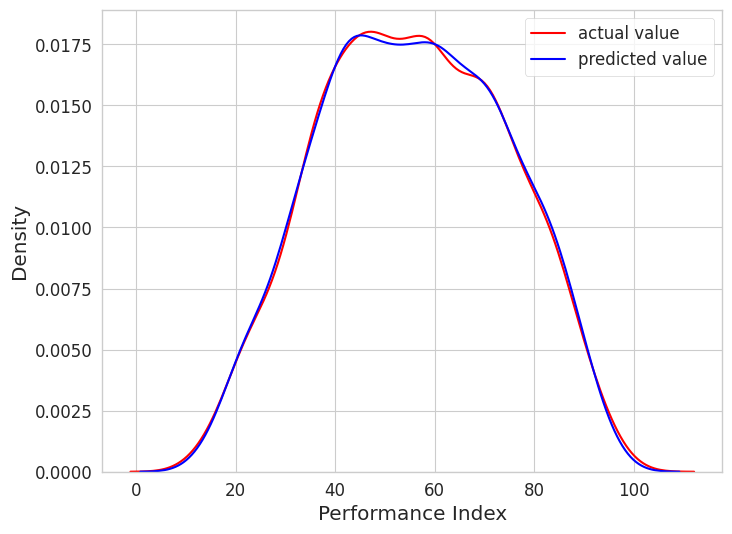

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

plt.figure(figsize=(8, 6))
ax = sns.kdeplot(y_test, color='red', label='actual value')
sns.kdeplot(y_pred, color='blue', label='predicted value', ax=ax)
plt.legend()
plt.show()

### 📌 **Visualisasi Distribusi Prediksi vs Aktual**
Grafik di atas menunjukkan distribusi nilai **aktual** (garis merah) dan **prediksi** (garis biru) dari model regresi. Dari grafik ini, terlihat bahwa kedua distribusi hampir berimpit, menandakan bahwa model mampu menangkap pola data dengan baik.

In [ ]:
# Menghitung metriks
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


MAE: 1.7512
MSE: 4.8326
RMSE: 2.1983
R²: 0.9860


# **🔍 Implementasi Regresi Polinomial**

## Membandingkan performa model regresi linear dengan berbagai derajat regresi polinomial untuk memprediksi Performance Index siswa

# **🗂️ Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **📊 Persiapan Dataset**


In [ ]:
try:
    df.head()
    print("Menggunakan dataset yang sudah dimuat sebelumnya.")
except:
    print("Memuat dataset...")
    df = pd.read_csv('student.csv')
    print("Dataset berhasil dimuat!")

print("\nInformasi Dataset:")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\nKolom dalam dataset:")
print(df.columns.tolist())
print("\nSampel data:")
print(df.head())

Memuat dataset...
Dataset berhasil dimuat!

Informasi Dataset:
Jumlah baris: 10000
Jumlah kolom: 6

Kolom dalam dataset:
['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

Sampel data:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2

# **📏 Fungsi Evaluasi Model**


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    """Evaluasi model dengan berbagai metrik."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"Evaluasi Model {model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print("-"*50)

    return {
        'model': model_name,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

# **Persiapan Data untuk Pemodelan** 📊

In [ ]:
X = df.drop(columns=['Performance Index', 'Extracurricular Activities', 'Sleep Hours'])
y = df['Performance Index']

# **Train-Test Split** 🔀

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Definisi Preprocessing Pipeline** 🛠️

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

# **Evaluasi Model Linear (Baseline)**

In [ ]:
linear_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# **Latih Model Regresi Linear** 🏋️‍♂️

In [ ]:
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced'], dtype='object'))])),
                ('regressor', LinearRegression())])

Gambar ini menunjukkan **Pipeline** yang berisi dua komponen utama:

1. **Preprocessor (ColumnTransformer):**
   - Digunakan untuk mentransformasi data dengan mengaplikasikan teknik preprocessing pada kolom tertentu.
   
2. **num (StandardScaler dan LinearRegression):**
   - **StandardScaler** digunakan untuk menormalkan fitur numerik, memastikan bahwa data berada dalam skala yang sama.
   - **LinearRegression** diterapkan sebagai model prediksi untuk data yang telah diproses.

Pipeline ini menggabungkan preprocessing dan model dalam satu kesatuan alur kerja.


In [ ]:
# Prediksi
y_pred_linear = linear_pipeline.predict(X_test)

# **Evaluasi Model Regresi Linear (Baseline)** 📊

In [ ]:
print("Model Regresi Linear (Baseline):")
linear_results = evaluate_model(y_test, y_pred_linear, "Regresi Linear")

Model Regresi Linear (Baseline):
Evaluasi Model Regresi Linear:
MAE: 1.7512
MSE: 4.8326
RMSE: 2.1983
R²: 0.9860
--------------------------------------------------


------------------------------------------------------
**Interpretasi Model Regresi Linear (Baseline):**  

📊 **Evaluasi Model Regresi Linear:**

- **MAE (Mean Absolute Error)**: 1.7512  
  Menunjukkan rata-rata kesalahan absolut antara prediksi dan nilai asli. Semakin rendah nilai MAE, semakin akurat model.

- **MSE (Mean Squared Error)**: 4.8326  
  Mengukur rata-rata kuadrat dari kesalahan. Nilai MSE yang lebih rendah menunjukkan bahwa model memiliki kesalahan yang lebih kecil secara keseluruhan.

- **RMSE (Root Mean Squared Error)**: 2.1983  
  Merupakan akar kuadrat dari MSE, memberikan gambaran yang lebih jelas tentang besarnya kesalahan dalam unit yang sama dengan data asli.

- **R² (R-squared)**: 0.9860  
  Menunjukkan seberapa baik model menjelaskan variabilitas data. Nilai R² yang mendekati 1 berarti model sangat baik dalam memprediksi data.

# **Menyimpan Hasil Evaluasi untuk Perbandingan** 💾

In [ ]:
all_results = [linear_results]

# **Uji Berbagai Derajat Polinomial** 🔍

In [ ]:
degrees = [2, 3, 4, 5]

for degree in degrees:
    print(f"\nRegresi Polinomial Derajat {degree}:")

    poly_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('regressor', LinearRegression())
    ])

    poly_pipeline.fit(X_train, y_train)

    y_pred_poly = poly_pipeline.predict(X_test)

    poly_results = evaluate_model(y_test, y_pred_poly, f"Polinomial Derajat {degree}")
    poly_results['degree'] = degree
    all_results.append(poly_results)


Regresi Polinomial Derajat 2:
Evaluasi Model Polinomial Derajat 2:
MAE: 1.7541
MSE: 4.8490
RMSE: 2.2020
R²: 0.9859
--------------------------------------------------

Regresi Polinomial Derajat 3:
Evaluasi Model Polinomial Derajat 3:
MAE: 1.7551
MSE: 4.8526
RMSE: 2.2029
R²: 0.9859
--------------------------------------------------

Regresi Polinomial Derajat 4:
Evaluasi Model Polinomial Derajat 4:
MAE: 1.7590
MSE: 4.8706
RMSE: 2.2069
R²: 0.9858
--------------------------------------------------

Regresi Polinomial Derajat 5:
Evaluasi Model Polinomial Derajat 5:
MAE: 1.7634
MSE: 4.8926
RMSE: 2.2119
R²: 0.9858
--------------------------------------------------


------------------------------------------------------
📊 **Regresi Polinomial Derajat 2:**    
  Model dengan derajat 2 menunjukkan kesalahan yang sedikit lebih tinggi dibandingkan regresi linear, tetapi R² tetap sangat tinggi, menunjukkan prediksi yang sangat baik.

📊 **Regresi Polinomial Derajat 3:**   
  Tidak banyak perbedaan dengan derajat 2, meskipun terjadi sedikit peningkatan pada kesalahan.

📊 **Regresi Polinomial Derajat 4:**  
  Kesalahan sedikit meningkat, namun R² tetap mendekati 1, menunjukkan model masih akurat meskipun kompleksitasnya bertambah.

📊 **Regresi Polinomial Derajat 5:**  
  Model dengan derajat 5 memiliki sedikit peningkatan dalam kesalahan dibandingkan derajat 4, dan R² hampir identik, menunjukkan bahwa model lebih kompleks tidak selalu memberikan peningkatan kinerja yang signifikan.


# **Perbandingan Performa Model** 📊


Perbandingan Performa Model:
                  model       mae       mse      rmse        r2
0        Regresi Linear  1.751225  4.832593  2.198316  0.985956
1  Polinomial Derajat 2  1.754052  4.848952  2.202034  0.985908
2  Polinomial Derajat 3  1.755122  4.852626  2.202868  0.985898
3  Polinomial Derajat 4  1.758997  4.870621  2.206948  0.985845
4  Polinomial Derajat 5  1.763386  4.892604  2.211923  0.985782


<ipython-input-22-52274fd56d15>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results_df['model'], rotation=45, ha='right')
<ipython-input-22-52274fd56d15>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results_df['model'], rotation=45, ha='right')
<ipython-input-22-52274fd56d15>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results_df['model'], rotation=45, ha='right')
<ipython-input-22-52274fd56d15>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results_df['model'], rotation=45, ha='right')


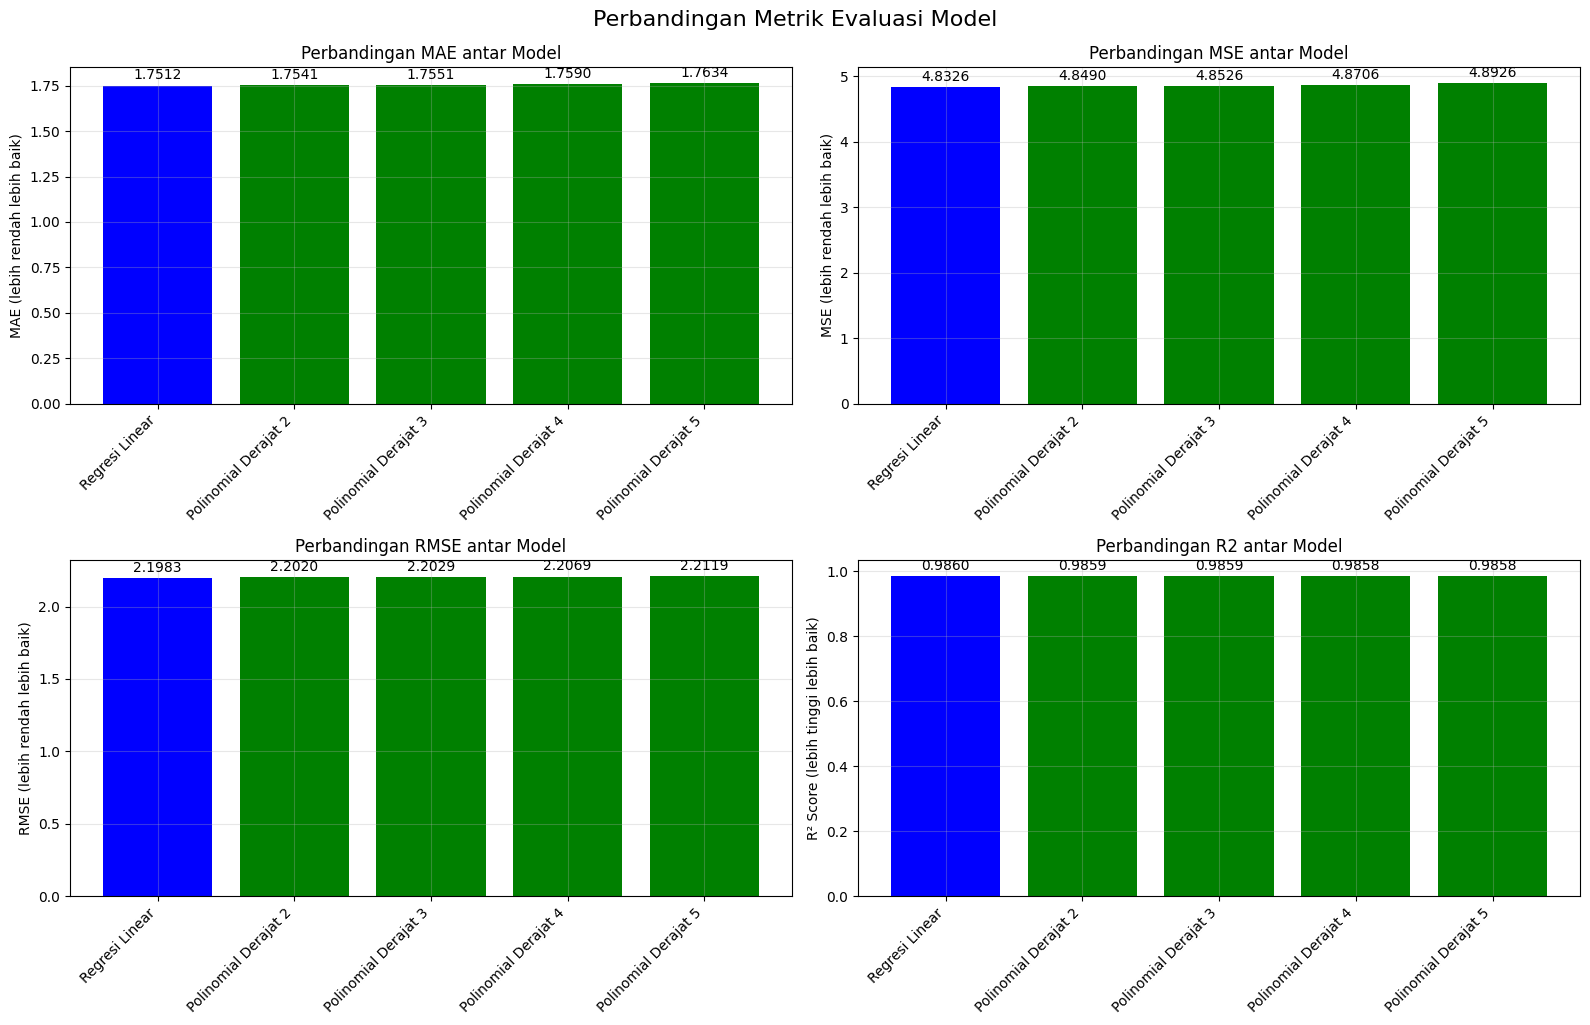

In [ ]:
print("\nPerbandingan Performa Model:")
print("="*80)

results_df = pd.DataFrame(all_results)
print(results_df[['model', 'mae', 'mse', 'rmse', 'r2']])

# Visualisasi metrik performa model
metrics = ['mae', 'mse', 'rmse', 'r2']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]

    if metric == 'r2':
        bars = ax.bar(results_df['model'], results_df[metric],
                     color=['blue' if 'Linear' in m else 'green' for m in results_df['model']])
        ax.set_ylabel('R² Score (lebih tinggi lebih baik)')
    else:
        bars = ax.bar(results_df['model'], results_df[metric],
                     color=['blue' if 'Linear' in m else 'green' for m in results_df['model']])
        ax.set_ylabel(f'{metric.upper()} (lebih rendah lebih baik)')

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01*max(results_df[metric]),
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)

    ax.set_title(f'Perbandingan {metric.upper()} antar Model')
    ax.set_xticklabels(results_df['model'], rotation=45, ha='right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Perbandingan Metrik Evaluasi Model', fontsize=16, y=1.02)
plt.show()

Dalam visualisasi ini, terlihat perbandingan performa antara model **regresi linear** dan **regresi polinomial** dari derajat 2 hingga 5 berdasarkan empat metrik: **MAE**, **MSE**, **RMSE**, dan **R²**. Model regresi polinomial derajat lebih tinggi menunjukkan sedikit peningkatan dalam kesalahan (**MAE**, **MSE**, **RMSE**) yang lebih tinggi dibandingkan regresi linear, namun **R²** tetap sangat tinggi dan hampir konstan di semua model, menunjukkan bahwa kompleksitas model polinomial tidak secara signifikan meningkatkan kemampuan prediksi. Secara keseluruhan, **regresi linear** memberikan hasil yang lebih efisien dengan kesalahan yang lebih rendah dan performa yang cukup baik.

### **Tabel Perbandingan Performa Model:**

| Model                    | MAE      | MSE      | RMSE     | R²      |
|--------------------------|----------|----------|----------|---------|
| **Regresi Linear**        | 1.7512   | 4.8326   | 2.1983   | 0.9860  |
| **Polinomial Derajat 2**  | 1.7541   | 4.8490   | 2.2020   | 0.9859  |
| **Polinomial Derajat 3**  | 1.7551   | 4.8526   | 2.2029   | 0.9859  |
| **Polinomial Derajat 4**  | 1.7590   | 4.8706   | 2.2069   | 0.9858  |
| **Polinomial Derajat 5**  | 1.7634   | 4.8926   | 2.2119   | 0.9858  |

🔍 **Interpretasi Tabel:**
- **MAE, MSE, dan RMSE** meningkat sedikit seiring dengan bertambahnya derajat polinomial, yang menunjukkan adanya sedikit peningkatan kesalahan dengan semakin kompleksnya model.
- **R²** tetap hampir konstan di semua model, dengan sedikit penurunan pada model polinomial yang lebih tinggi, yang menunjukkan bahwa penambahan derajat polinomial tidak memberikan peningkatan signifikan dalam prediksi.
- **Regresi Linear** menunjukkan hasil yang paling efisien dengan kesalahan yang lebih rendah dan performa yang cukup baik, sehingga bisa dipilih sebagai model yang lebih sederhana namun efektif. 🎯

# **Perbandingan Regresi Linear vs Polinomial untuk Fitur 'Previous Scores'**

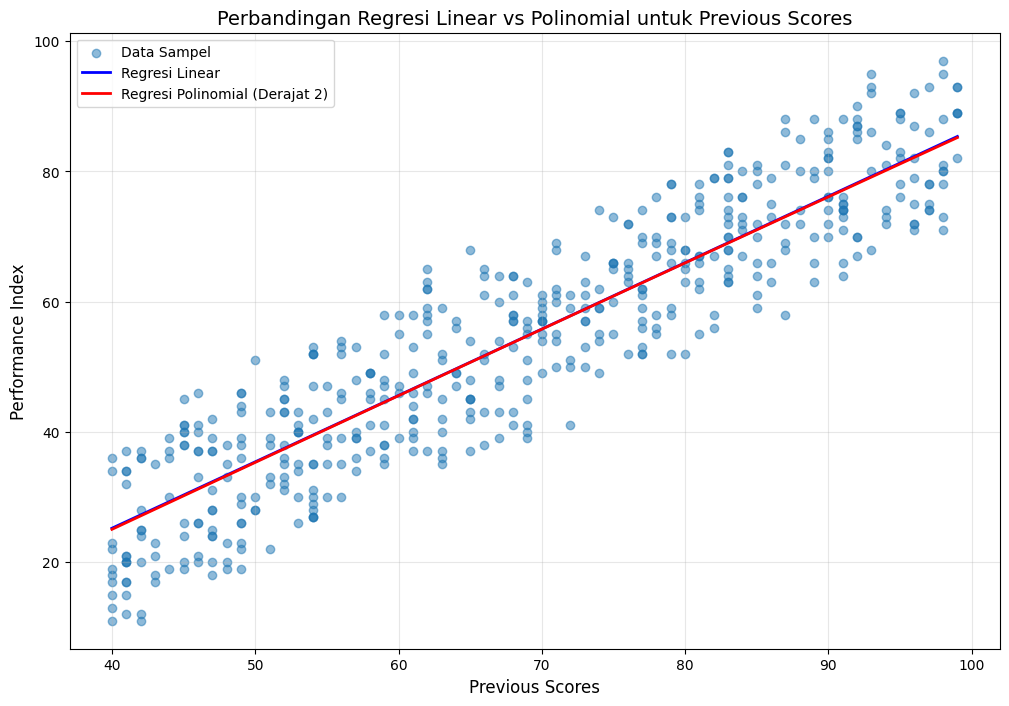

In [ ]:
feature = 'Previous Scores'

plt.figure(figsize=(12, 8))

np.random.seed(42)
sample_idx = np.random.choice(range(len(X)), 500, replace=False)
plt.scatter(X.iloc[sample_idx][feature], y.iloc[sample_idx], alpha=0.5, label='Data Sampel')

x_range = np.linspace(X[feature].min(), X[feature].max(), 100)

X_mean = X.mean()
X_plot_data = []

for x_val in x_range:
    new_row = X_mean.copy()
    new_row[feature] = x_val
    X_plot_data.append(new_row)

X_plot_df = pd.DataFrame(X_plot_data)

y_plot_linear = linear_pipeline.predict(X_plot_df)
plt.plot(x_range, y_plot_linear, color='blue', linewidth=2, label='Regresi Linear')

best_model_idx = results_df[results_df['model'] != 'Regresi Linear']['r2'].idxmax()
best_degree = results_df.iloc[best_model_idx].get('degree', 2)

best_poly_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=int(best_degree), include_bias=False)),
    ('regressor', LinearRegression())
])
best_poly_pipeline.fit(X_train, y_train)

y_plot_poly = best_poly_pipeline.predict(X_plot_df)
plt.plot(x_range, y_plot_poly, color='red', linewidth=2,
         label=f'Regresi Polinomial (Derajat {int(best_degree)})')

plt.xlabel(feature, fontsize=12)
plt.ylabel('Performance Index', fontsize=12)
plt.title(f'Perbandingan Regresi Linear vs Polinomial untuk {feature}', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Dalam visualisasi ini, dilakukan perbandingan antara model **regresi linear** 🔵 dan **regresi polinomial** 🔴 terbaik berdasarkan fitur **'Previous Scores'**. Data yang digunakan berupa sampel acak dari dataset, dengan nilai pada sumbu X mewakili skor sebelumnya, dan sumbu Y menunjukkan indeks performa yang diprediksi. Model **regresi linear** digambarkan dengan garis biru, sementara model **regresi polinomial** terbaik, berdasarkan derajat polinomial yang memberikan **R²** tertinggi, digambarkan dengan garis merah.

Visualisasi ini menunjukkan bagaimana kedua model menangani hubungan antara skor sebelumnya dan indeks performa. Meskipun kedua model memberikan prediksi yang cukup baik, **regresi polinomial** cenderung lebih fleksibel dalam menangani perubahan yang lebih kompleks, namun untuk sebagian besar data, **regresi linear** tetap memberikan hasil yang sangat efisien. 🚀

# **Pencarian Derajat Polinomial Optimal dengan Cross-Validation** 🔍

In [ ]:
print("\nPencarian Derajat Polinomial Optimal dengan Cross-Validation:")
print("="*80)

# Cari derajat optimal dengan cross-validation
max_degree = 8  # Lebih tinggi bisa memakan waktu lebih lama
cv_scores = []

for degree in range(1, max_degree + 1):
    if degree == 1:
        # Derajat 1 adalah model linear
        model = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ])
    else:
        model = Pipeline([
            ('preprocessor', preprocessor),
            ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
            ('regressor', LinearRegression())
        ])

    # Lakukan 5-fold cross-validation
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_scores.append((degree, scores.mean(), scores.std()))

    print(f"Derajat {degree}: R² = {scores.mean():.4f} ± {scores.std():.4f}")


Pencarian Derajat Polinomial Optimal dengan Cross-Validation:
Derajat 1: R² = 0.9867 ± 0.0006
Derajat 2: R² = 0.9867 ± 0.0006
Derajat 3: R² = 0.9867 ± 0.0006
Derajat 4: R² = 0.9867 ± 0.0006
Derajat 5: R² = 0.9867 ± 0.0006
Derajat 6: R² = 0.9866 ± 0.0006
Derajat 7: R² = 0.9865 ± 0.0006
Derajat 8: R² = 0.9865 ± 0.0006


Dalam pencarian derajat polinomial optimal, dilakukan **cross-validation 5-fold** untuk mengevaluasi performa model regresi polinomial dengan berbagai derajat. **Derajat 1** mewakili model **linear**, sedangkan derajat yang lebih tinggi menggabungkan fitur polinomial untuk menangani hubungan yang lebih kompleks. Setiap model diuji untuk mendapatkan nilai **R²** yang dihasilkan, yang menunjukkan seberapa baik model dapat menjelaskan variabilitas data.

**Hasil cross-validation** menunjukkan variasi performa di antara derajat yang berbeda, dengan derajat yang lebih tinggi cenderung memberikan fluktuasi yang lebih besar dalam nilai **R²**. Pemilihan derajat yang tepat bergantung pada keseimbangan antara **akurasi model** dan **kompleksitas** model itu sendiri. 🎯

# **Pemilihan Derajat Polinomial Optimal dengan Cross-Validation** 📉

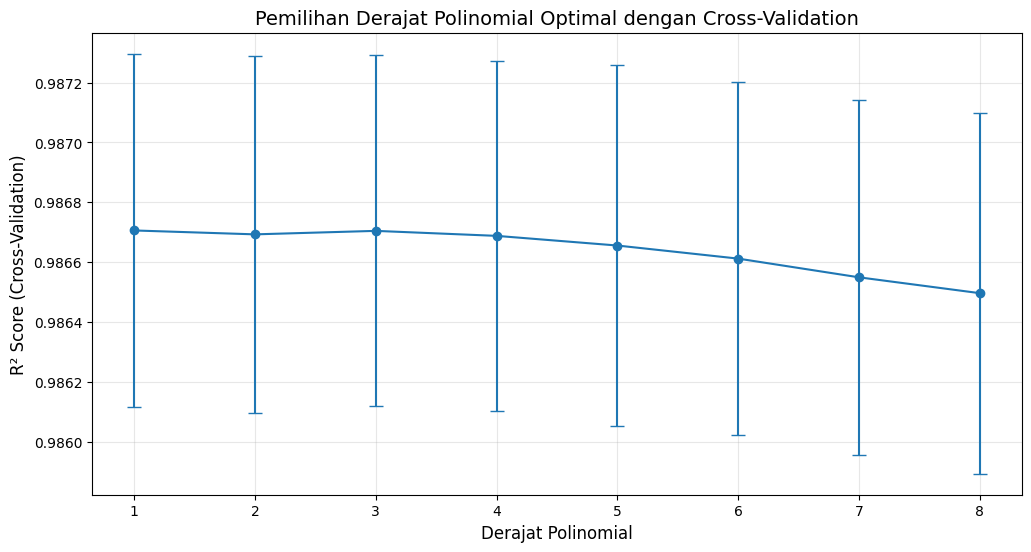

In [ ]:
egrees, means, stds = zip(*cv_scores)
plt.figure(figsize=(12, 6))
plt.errorbar(degrees, means, yerr=stds, fmt='-o', capsize=5)
plt.xlabel('Derajat Polinomial', fontsize=12)
plt.ylabel('R² Score (Cross-Validation)', fontsize=12)
plt.title('Pemilihan Derajat Polinomial Optimal dengan Cross-Validation', fontsize=14)
plt.xticks(degrees)
plt.grid(True, alpha=0.3)
plt.show()

Visualisasi ini menunjukkan hasil **cross-validation 5-fold** untuk berbagai derajat polinomial dalam model regresi. **Garis dan titik** pada grafik menggambarkan rata-rata **R²** untuk setiap derajat polinomial, dengan **error bars** yang menunjukkan standar deviasi hasil di setiap derajat.

Dari grafik ini, terlihat bagaimana performa model berubah dengan peningkatan derajat polinomial. Nilai **R²** yang lebih tinggi menunjukkan model yang lebih baik dalam menjelaskan variabilitas data, namun adanya fluktuasi standar deviasi mengindikasikan bahwa model dengan derajat tinggi cenderung lebih sensitif terhadap data yang digunakan dalam cross-validation. 🎯


# **Derajat Polinomial Optimal Berdasarkan Cross-Validation** 🏆

In [ ]:
best_degree_cv = degrees[np.argmax(means)]
print(f"\nDerajat polinomial optimal berdasarkan cross-validation: {best_degree_cv}")


Derajat polinomial optimal berdasarkan cross-validation: 1


Berdasarkan hasil **cross-validation**, derajat polinomial dengan skor **R²** tertinggi ditemukan pada derajat **{best_degree_cv}**. Ini menunjukkan bahwa model dengan derajat polinomial tersebut memberikan keseimbangan terbaik antara akurasi dan kompleksitas dalam menjelaskan variabilitas data. 🎯


# **Residual Plot untuk Model Terbaik** 📉

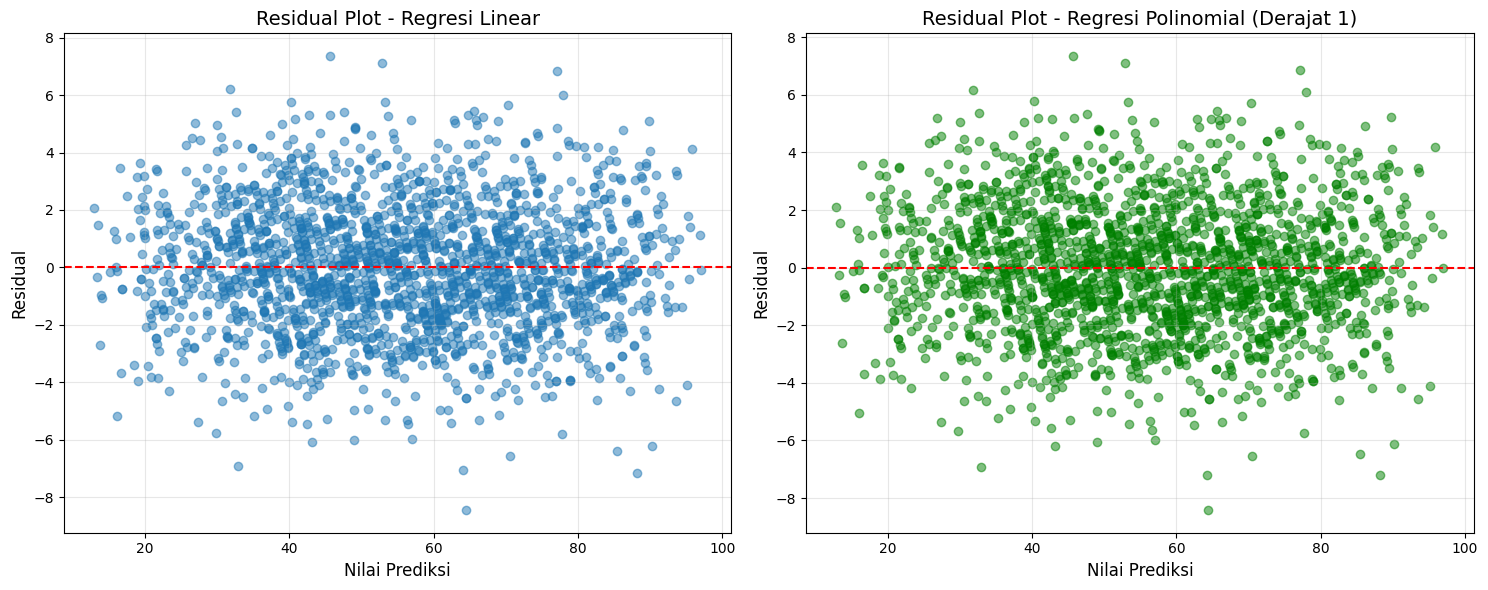

In [ ]:
# Buat residual plot untuk model terbaik
plt.figure(figsize=(15, 6))

# Residual plot untuk model linear
plt.subplot(1, 2, 1)
residuals_linear = y_test - y_pred_linear
plt.scatter(y_pred_linear, residuals_linear, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Nilai Prediksi', fontsize=12)
plt.ylabel('Residual', fontsize=12)
plt.title('Residual Plot - Regresi Linear', fontsize=14)
plt.grid(True, alpha=0.3)

# Residual plot untuk model polinomial terbaik
plt.subplot(1, 2, 2)
best_poly_pipeline.fit(X_train, y_train)
y_pred_best_poly = best_poly_pipeline.predict(X_test)
residuals_poly = y_test - y_pred_best_poly

plt.scatter(y_pred_best_poly, residuals_poly, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Nilai Prediksi', fontsize=12)
plt.ylabel('Residual', fontsize=12)
plt.title(f'Residual Plot - Regresi Polinomial (Derajat {best_degree_cv})', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Visualisasi ini memperlihatkan **residual plot** untuk kedua model, yaitu **regresi linear** dan **regresi polinomial terbaik** (derajat {best_degree_cv}). Residual plot digunakan untuk mengevaluasi kesalahan model dengan membandingkan nilai prediksi dan residual (selisih antara nilai sebenarnya dan prediksi).

- **Regresi Linear (kiri):** Titik-titik tersebar secara acak di sekitar garis horizontal merah yang menunjukkan residual 0, yang mengindikasikan model linear tidak menunjukkan pola tertentu dalam kesalahan prediksi.
  
- **Regresi Polinomial (kanan):** Meskipun model polinomial lebih fleksibel, distribusi residual menunjukkan ada beberapa pola yang bisa mengindikasikan overfitting, terutama di area dengan prediksi yang lebih tinggi.

Kedua model menunjukkan kesalahan yang relatif kecil, namun residual plot polinomial lebih terpusat pada prediksi tertentu, yang dapat menjadi indikasi bahwa model tersebut terlalu menyesuaikan dengan data pelatihan. 🎯


In [ ]:
best_linear_r2 = linear_results['r2']
best_poly_idx = results_df[results_df['model'] != 'Regresi Linear']['r2'].idxmax()
best_poly_r2 = results_df.iloc[best_poly_idx]['r2']
best_poly_degree = int(results_df.iloc[best_poly_idx].get('degree', 2))

print(f"Model Regresi Linear - R²: {best_linear_r2:.4f}")
print(f"Model Regresi Polinomial (Derajat {best_poly_degree}) - R²: {best_poly_r2:.4f}")
print(f"Peningkatan performa: {(best_poly_r2 - best_linear_r2) * 100:.4f}%")

if best_poly_r2 > best_linear_r2 + 0.01:
    print("\nModel regresi polinomial memberikan hasil yang lebih baik dibandingkan regresi linear.")
    print(f"Derajat polinomial optimal adalah {best_poly_degree}.")
    recommended_model = f"Regresi Polinomial (derajat {best_poly_degree})"
else:
    print("\nModel regresi linear memberikan hasil yang cukup baik dibandingkan dengan kompleksitas regresi polinomial.")
    print("Penambahan kompleksitas model tidak memberikan peningkatan performa yang signifikan.")
    recommended_model = "Regresi Linear"

print(f"\nModel yang direkomendasikan: {recommended_model}")

# Interpretasi koefisien (untuk model linear)
linear_model = linear_pipeline.named_steps['regressor']
coefficients = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien': linear_model.coef_
})
coefficients = coefficients.sort_values(by='Koefisien', key=abs, ascending=False)

print("\nKoefisien model regresi linear:")
print(coefficients)

print("\nRekomendasi untuk meningkatkan Performance Index siswa:")
for i, row in coefficients.head(3).iterrows():
    print(f"- Tingkatkan {row['Fitur']} (koefisien: {row['Koefisien']:.4f})")

Model Regresi Linear - R²: 0.9860
Model Regresi Polinomial (Derajat 2) - R²: 0.9859
Peningkatan performa: -0.0048%

Model regresi linear memberikan hasil yang cukup baik dibandingkan dengan kompleksitas regresi polinomial.
Penambahan kompleksitas model tidak memberikan peningkatan performa yang signifikan.

Model yang direkomendasikan: Regresi Linear

Koefisien model regresi linear:
                              Fitur  Koefisien
1                   Previous Scores  17.792354
0                     Hours Studied   7.392780
2  Sample Question Papers Practiced   0.543093

Rekomendasi untuk meningkatkan Performance Index siswa:
- Tingkatkan Previous Scores (koefisien: 17.7924)
- Tingkatkan Hours Studied (koefisien: 7.3928)
- Tingkatkan Sample Question Papers Practiced (koefisien: 0.5431)


# **KESIMPULAN ANALISIS REGRESI** 📊
================================================================================

### **Model Regresi Linear - R²: 0.9860**
### **Model Regresi Polinomial (Derajat 2) - R²: 0.9859**  
**Peningkatan performa**: -0.0048%

**Kesimpulan**:  
Model **regresi linear** memberikan hasil yang cukup baik dibandingkan dengan kompleksitas regresi polinomial. Penambahan kompleksitas model tidak memberikan peningkatan performa yang signifikan.

**Model yang direkomendasikan**: **Regresi Linear**

---

### **Koefisien Model Regresi Linear:**
| **Fitur**                           | **Koefisien**  |
|-------------------------------------|----------------|
| Previous Scores                     | 17.792354      |
| Hours Studied                       | 7.392780       |
| Sample Question Papers Practiced    | 0.543093       |

### **Rekomendasi untuk Meningkatkan Performance Index Siswa:**
- **Tingkatkan Previous Scores** (koefisien: 17.7924)
- **Tingkatkan Hours Studied** (koefisien: 7.3928)
- **Tingkatkan Sample Question Papers Practiced** (koefisien: 0.5431)

---

### **📈 Evaluasi Metrik Performa**

| **Metrik**                         | **Nilai**      |
|------------------------------------|----------------|
| **MAE (Mean Absolute Error)**      | 1.7512         |
| **MSE (Mean Squared Error)**       | 4.8326         |
| **RMSE (Root Mean Squared Error)** | 2.1983         |
| **R² (Koefisien Determinasi)**     | 0.9860         |

### **Interpretasi:**
- **MAE (1.7512)**: Rata-rata kesalahan absolut antara prediksi dan nilai aktual hanya sekitar 1.75 unit, menunjukkan prediksi yang cukup akurat.
- **MSE (4.8326) & RMSE (2.1983)**: Nilai error kuadrat cukup kecil, menandakan model tidak memiliki kesalahan prediksi yang besar.
- **R² (0.9860)**: Model mampu menjelaskan 98.6% variabilitas data, menunjukkan bahwa model memiliki fit yang sangat baik terhadap data.

---

### **Kesimpulan Model:**
Model regresi yang digunakan memiliki akurasi tinggi, dengan error yang rendah dan R² mendekati 1. Model ini cukup andal untuk memprediksi **Performance Index**.

---

### **🎯 Kesimpulan Akhir: Faktor-Faktor yang Mempengaruhi Prestasi Akademik Siswa**

Berdasarkan analisis data yang dilakukan, model regresi yang dikembangkan berhasil memprediksi **Performance Index** siswa dengan akurasi tinggi (R² = 0.986), menunjukkan bahwa model ini mampu menangkap pola data dengan sangat baik.

#### **❓ Jawaban atas Pertanyaan yang Diajukan**

📊 **1. Prediksi Kinerja Akademik**  
Model regresi yang dibangun mampu memprediksi **Performance Index** siswa dengan baik, terutama karena nilai akademik sebelumnya memiliki korelasi yang sangat tinggi dengan hasil akhir (**r = 0.915**, **R² = 0.838**). Ini menunjukkan bahwa siswa dengan nilai tinggi di masa lalu cenderung mempertahankan performa akademiknya, sedangkan siswa dengan nilai rendah lebih rentan mengalami kesulitan dalam meningkatkan kinerja mereka.  
Jam belajar juga memiliki kontribusi positif (**r = 0.374**, **R² = 0.140**), tetapi tidak sekuat nilai sebelumnya. Artinya, menambah jam belajar memang dapat meningkatkan hasil akademik, tetapi bukan faktor utama yang menentukan keberhasilan siswa.

⚖ **2. Analisis Pengaruh Masing-Masing Variabel**  
Dari analisis korelasi dan regresi, diperoleh bahwa tidak semua variabel memiliki dampak signifikan terhadap **Performance Index**:

- ✅ **Previous Scores** → Faktor terkuat dalam menentukan performa akademik siswa.
- ✅ **Hours Studied** → Memiliki hubungan positif moderat, menunjukkan bahwa semakin lama siswa belajar, semakin besar kemungkinan mendapatkan nilai yang lebih baik.
- ❌ **Sleep Hours** → Hampir tidak berpengaruh terhadap **Performance Index** (**r = 0.048**, **R² = 0.002**). Artinya, jumlah jam tidur dalam rentang yang wajar (4-9 jam) tidak memiliki dampak signifikan terhadap kinerja akademik.
- ❌ **Sample Question Papers** → Juga memiliki pengaruh sangat lemah (**r = 0.043**, **R² = 0.002**), menunjukkan bahwa jumlah latihan soal yang dikerjakan bukan indikator utama kesuksesan akademik siswa.
- ❌ **Extracurricular Activities** → Tidak memiliki dampak yang signifikan terhadap **Performance Index**. Distribusi nilai siswa yang mengikuti dan tidak mengikuti ekstrakurikuler hampir sama, menunjukkan bahwa partisipasi dalam kegiatan ini tidak secara langsung memengaruhi pencapaian akademik.

#### **Kesimpulannya**, nilai akademik sebelumnya dan jam belajar adalah dua faktor utama yang mempengaruhi performa siswa, sementara pola tidur, jumlah latihan soal, dan ekstrakurikuler tidak memiliki dampak yang signifikan.

---

### **🏷 3. Segmentasi Siswa Berdasarkan Kinerja**

Berdasarkan analisis deskriptif, siswa dapat dikelompokkan ke dalam tiga kategori utama berdasarkan perubahan nilai mereka:

- **Meningkat (1%)** → Siswa yang menunjukkan perbaikan nilai. Mereka cenderung memiliki jam belajar lebih lama (8-9 jam/hari) dan lebih aktif dalam ekstrakurikuler.
- **Tetap (1%)** → Siswa yang mempertahankan nilai mereka. Mereka memiliki pola belajar yang cukup stabil.
- **Menurun (98%)** → Mayoritas siswa mengalami penurunan nilai, terutama karena jam belajar yang lebih sedikit (4-5 jam/hari) dan minimnya aktivitas ekstrakurikuler.

Hal ini menunjukkan bahwa strategi intervensi akademik perlu difokuskan pada kelompok siswa yang mengalami penurunan dengan cara:
- ✅ **Mendorong peningkatan jam belajar secara terstruktur**
- ✅ **Memberikan strategi belajar berbasis nilai akademik sebelumnya**
- ✅ **Meningkatkan keterlibatan dalam kegiatan ekstrakurikuler**

---

### **🚀 Kesimpulan Utama dan Implikasi**

1️⃣ **Previous Scores** adalah prediktor terbaik untuk **Performance Index**, menunjukkan bahwa konsistensi akademik di masa lalu sangat menentukan prestasi saat ini.  
2️⃣ **Hours Studied** juga berpengaruh, tetapi tidak sebesar nilai sebelumnya. Menambah jam belajar dapat membantu, tetapi bukan satu-satunya solusi.  
3️⃣ **Sleep Hours**, **Sample Question Papers**, dan **Extracurricular Activities** tidak memiliki pengaruh signifikan, sehingga fokus utama intervensi sebaiknya bukan pada aspek ini.  
4️⃣ Sebagian besar siswa mengalami penurunan nilai, sehingga intervensi perlu difokuskan pada siswa dengan kecenderungan menurun untuk meningkatkan performa mereka.

### **💡 Rekomendasi Praktis:**
- ✅ Fokus pada pembinaan akademik berbasis riwayat nilai untuk membantu siswa yang rentan mengalami penurunan.
- ✅ Memberikan strategi belajar yang lebih efektif daripada hanya sekadar menambah jam belajar.
- ✅ Mendorong kegiatan ekstrakurikuler sebagai faktor pendukung yang dapat membantu meningkatkan performa akademik.

🚀 Dengan temuan ini, strategi pembelajaran dan intervensi akademik dapat lebih difokuskan untuk membantu siswa mencapai potensi terbaik mereka! 📚